In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import os
import re
import string
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords, wordnet
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from textblob import TextBlob, Word
from nltk.stem.wordnet import WordNetLemmatizer
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yelp-datasets/yelp_academic_dataset_review.json
/kaggle/input/yelp-datasets/yelp_academic_dataset_business.json
/kaggle/input/yelp-datasets/yelp_academic_dataset_user.json


## Load dataset

In [2]:
# import the data (chunksize returns jsonReader for iteration)
rest = pd.read_json("/kaggle/input/yelp-datasets/yelp_academic_dataset_business.json", lines=True, orient='columns', chunksize=1000000)
reviews = pd.read_json("/kaggle/input/yelp-datasets/yelp_academic_dataset_review.json", lines=True, orient='columns', chunksize=1000000)
users = pd.read_json("/kaggle/input/yelp-datasets/yelp_academic_dataset_user.json", lines=True, orient='columns', chunksize=1000000)

In [3]:
for resto in rest:
    subset_resto = resto
    break
    
for review in reviews:
    subset_review = review
    break
        
for user in users:
    subset_user = user
    break

In [4]:
subset_resto.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."


In [5]:
subset_user.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,ntlvfPzc8eglqvk92iDIAw,Rafael,553,2007-07-06 03:27:11,628,225,227,,"oeMvJh94PiGQnx_6GlndPQ, wm1z1PaJKvHgSDRKfwhfDg...",14,...,2,1,0,1,11,15,22,22,10,0
1,FOBRPlBHa3WPHFB5qYDlVg,Michelle,564,2008-04-28 01:29:25,790,316,400,"2008,2009,2010,2011,2012,2013","ly7EnE8leJmyqyePVYFlug, pRlR63iDytsnnniPb3AOug...",27,...,4,5,2,1,33,37,63,63,21,5
2,zZUnPeh2hEp0WydbAZEOOg,Martin,60,2008-08-28 23:40:05,151,125,103,2010,"Uwlk0txjQBPw_JhHsQnyeg, Ybxr1tSCkv3lYA0I1qmnPQ...",5,...,6,0,1,0,3,7,17,17,4,1
3,QaELAmRcDc5TfJEylaaP8g,John,206,2008-09-20 00:08:14,233,160,84,2009,"iog3Nyg1i4jeumiTVG_BSA, M92xWY2Vr9w0xoH8bPplfQ...",6,...,1,0,0,0,7,14,7,7,2,0
4,xvu8G900tezTzbbfqmTKvA,Anne,485,2008-08-09 00:30:27,1265,400,512,"2009,2010,2011,2012,2014,2015,2016,2017,2018","3W3ZMSthojCUirKEqAwGNw, eTIbuu23j9tOgmIa9POyLQ...",78,...,9,2,1,1,22,28,31,31,19,31


In [6]:
subset_review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2,5,0,0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1,1,1,0,I am actually horrified this place is still in...,2013-12-07 03:16:52
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1,0,0,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4,0,0,0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57


## Preprocessing data

### Preprocessing dataset business

#### Filter dataset bussiness 
> Filter hanya Toronto dan category restoran

In [7]:
# Businesses in Toronto and currently open business
city = subset_resto[(subset_resto['city'] == 'Toronto') & (subset_resto['is_open'] == 1)]
toronto = city[['business_id','name','address', 'categories', 'attributes','stars']]
toronto

,business_id,name,address,categories,attributes,stars
9,EosRKXIGeSWFYWwpkbhNnA,Xtreme Couture,700 Kipling Avenue Etobicoke,"Martial Arts, Gyms, Fitness & Instruction, Act...","{'GoodForKids': 'True', 'ByAppointmentOnly': '...",3.0
26,1wWneWD_E1pBIyVpdHMaQg,Air Jordan Store,306 Yonge Street,"Shopping, Shoe Stores, Fashion","{'RestaurantsPriceRange2': '3', 'BikeParking':...",4.0
52,9JCjKd6eFXsAMVwouTh_4Q,Bath and Body Works,1900 Eglintion Ave E,"Cosmetics & Beauty Supply, Shopping, Beauty & ...","{'RestaurantsPriceRange2': '2', 'ByAppointment...",3.5
73,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,688 Gerrard Street E,"Vietnamese, Restaurants","{'RestaurantsTakeOut': 'True', 'Alcohol': 'u'b...",4.0
74,OT-8IUWo_2M-rHddjzz_Cg,Equipment Sales and Long Term Rentals - Redlin...,"510 Coronation Dr. Unit #18, Unit 18","Event Planning & Services, Photo Booth Rentals...",{'WheelchairAccessible': 'True'},1.5
...,...,...,...,...,...,...
209351,0hudPyuCBlKg79OwKBw-eQ,The Black Bull,298 Queen Street W,"Pubs, Bars, Nightlife","{'Alcohol': 'u'full_bar'', 'NoiseLevel': 'u'av...",2.5
209359,GAgEoHcf4PSuZRS5Zd3ltA,Q's Shawarma,1075 Martin Grove Road,"Restaurants, Mediterranean","{'GoodForKids': 'True', 'HasTV': 'True', 'Rest...",4.0
209374,BtTCTHwoIfr3fBQjaOkpIw,Starbucks,81 Front Street E,"Coffee & Tea, Food","{'WiFi': 'u'free'', 'BusinessParking': '{'gara...",4.0
209377,n2BKYb8aw4AhRKLkdUjQRg,Steak & Cheese & Quick Pita Restaurant,199 College St,"Sandwiches, Restaurants","{'OutdoorSeating': 'False', 'Alcohol': 'u'none...",2.5


In [8]:
# getting just restaurants from Toronto business
rest = toronto[toronto['categories'].str.contains('Restaurant.*')==True].reset_index()
rest

,index,business_id,name,address,categories,attributes,stars
0,73,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,688 Gerrard Street E,"Vietnamese, Restaurants","{'RestaurantsTakeOut': 'True', 'Alcohol': 'u'b...",4.0
1,110,8k62wYhDVq1-652YbJi5eg,Tim Hortons,90 Adelaide Street W,"Bagels, Donuts, Food, Cafes, Coffee & Tea, Res...","{'OutdoorSeating': 'False', 'RestaurantsDelive...",3.0
2,149,0DnQh8SE8BSnvJltGCCiWg,Chick-N-Joy,3-1265 York Mills Road,"Fast Food, Restaurants, Chicken Shop","{'NoiseLevel': ''loud'', 'BusinessParking': '{...",3.0
3,150,NLaK58WvlNQdUunSIkt-jA,Zav Coffee Shop & Gallery,2048 Danforth Avenue,"Coffee & Tea, Restaurants, Sandwiches, Food","{'DogsAllowed': 'False', 'OutdoorSeating': 'Tr...",4.5
4,161,cicPsia8Wj-DNRkmLbD_xg,The Keg Steakhouse + Bar,2201 Yonge Street,"Steakhouses, Restaurants, Nightlife, Seafood, ...","{'GoodForKids': 'True', 'RestaurantsGoodForGro...",3.5
...,...,...,...,...,...,...,...
5459,209300,thzyiQZb16zD8wMliaEfRQ,Sushi Supreme,1995 Yonge Street,"Sushi Bars, Restaurants, Japanese","{'Ambience': '{'romantic': False, 'intimate': ...",4.0
5460,209315,eUi3O-8Gqh_nJ_ZhO-25gQ,Get & Go Burrito,"1077 Wilson Avenue, Unit 8","Mexican, Restaurants","{'BusinessParking': '{'garage': False, 'street...",3.5
5461,209328,yFQCdWr_k1pTObzHPGis9Q,Grasshopper Restaurant,310 College Street,"Vegan, Restaurants, Vegetarian, Salad","{'DogsAllowed': 'False', 'BikeParking': 'True'...",4.0
5462,209359,GAgEoHcf4PSuZRS5Zd3ltA,Q's Shawarma,1075 Martin Grove Road,"Restaurants, Mediterranean","{'GoodForKids': 'True', 'HasTV': 'True', 'Rest...",4.0


In [9]:
df_resto = rest[['business_id','name', 'categories']]
df_resto.head()

,business_id,name,categories
0,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,"Vietnamese, Restaurants"
1,8k62wYhDVq1-652YbJi5eg,Tim Hortons,"Bagels, Donuts, Food, Cafes, Coffee & Tea, Res..."
2,0DnQh8SE8BSnvJltGCCiWg,Chick-N-Joy,"Fast Food, Restaurants, Chicken Shop"
3,NLaK58WvlNQdUunSIkt-jA,Zav Coffee Shop & Gallery,"Coffee & Tea, Restaurants, Sandwiches, Food"
4,cicPsia8Wj-DNRkmLbD_xg,The Keg Steakhouse + Bar,"Steakhouses, Restaurants, Nightlife, Seafood, ..."


#### Memecah categories menjadi series
> Membuat df dummy untuk membuat data menjadi one hot encoding

In [10]:
# get dummies from categories
df_categories_dummies = pd.Series(df_resto['categories']).str.get_dummies(',')
df_categories_dummies

,Acai Bowls,Accessories,Accountants,Acne Treatment,Active Life,Afghan,African,Alternative Medicine,American (New),American (Traditional),...,Ukrainian,Vegan,Vegetarian,Vietnamese,Waffles,Whiskey Bars,Wine Bars,Wineries,Women's Clothing,Yelp Events
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5461,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5462,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# pull out names and stars from rest table 
result = df_resto[['business_id', 'name']]
result

,business_id,name
0,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant
1,8k62wYhDVq1-652YbJi5eg,Tim Hortons
2,0DnQh8SE8BSnvJltGCCiWg,Chick-N-Joy
3,NLaK58WvlNQdUunSIkt-jA,Zav Coffee Shop & Gallery
4,cicPsia8Wj-DNRkmLbD_xg,The Keg Steakhouse + Bar
...,...,...
5459,thzyiQZb16zD8wMliaEfRQ,Sushi Supreme
5460,eUi3O-8Gqh_nJ_ZhO-25gQ,Get & Go Burrito
5461,yFQCdWr_k1pTObzHPGis9Q,Grasshopper Restaurant
5462,GAgEoHcf4PSuZRS5Zd3ltA,Q's Shawarma


In [12]:
# Concat all tables and drop Restaurant column
# df_resto = pd.concat([result, df_attr_dummies, df_categories_dummies, ], axis=1)
df_resto = pd.concat([result, df_categories_dummies], axis=1)
df_resto.drop('Restaurants',inplace=True,axis=1)

In [13]:
df_resto.head()

,business_id,name,Acai Bowls,Accessories,Accountants,Acne Treatment,Active Life,Afghan,African,Alternative Medicine,...,Ukrainian,Vegan,Vegetarian,Vietnamese,Waffles,Whiskey Bars,Wine Bars,Wineries,Women's Clothing,Yelp Events
0,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,8k62wYhDVq1-652YbJi5eg,Tim Hortons,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0DnQh8SE8BSnvJltGCCiWg,Chick-N-Joy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NLaK58WvlNQdUunSIkt-jA,Zav Coffee Shop & Gallery,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,cicPsia8Wj-DNRkmLbD_xg,The Keg Steakhouse + Bar,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
attribute_resto = np.array(df_resto.columns)

In [15]:
attribute_resto.shape

(556,)

In [16]:
print(df_resto.isna().sum())

business_id         0
name                0
 Acai Bowls         0
 Accessories        0
 Accountants        0
                   ..
Whiskey Bars        0
Wine Bars           0
Wineries            0
Women's Clothing    0
Yelp Events         0
Length: 556, dtype: int64


### Preprocessing dataset user

In [17]:
subset_user.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')

In [18]:
df_user = subset_user[['user_id', 'name','compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos']]

In [19]:
df_user.rename(columns={'name' : 'username'}, inplace=True)
df_user

/tmp/ipykernel_33/1685475843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user.rename(columns={'name' : 'username'}, inplace=True)


,user_id,username,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,ntlvfPzc8eglqvk92iDIAw,Rafael,3,2,1,0,1,11,15,22,22,10,0
1,FOBRPlBHa3WPHFB5qYDlVg,Michelle,36,4,5,2,1,33,37,63,63,21,5
2,zZUnPeh2hEp0WydbAZEOOg,Martin,9,6,0,1,0,3,7,17,17,4,1
3,QaELAmRcDc5TfJEylaaP8g,John,2,1,0,0,0,7,14,7,7,2,0
4,xvu8G900tezTzbbfqmTKvA,Anne,8,9,2,1,1,22,28,31,31,19,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,7Ou5rVET8Pyud92D_0fRyw,Adam,0,0,0,0,0,0,0,0,0,0,0
999996,K0anX_CtauvzemDQRxrJpQ,Mandeep,0,0,0,0,0,0,0,0,0,0,0
999997,hrbY1cmIzw6DEG6ZOnD4VA,Amber,0,0,0,0,0,0,1,0,0,1,0
999998,J0R1oEDRQlySMSX29FRhQg,Kaitlin,0,0,0,0,0,0,0,1,1,0,0


In [20]:
attribute_user = np.array(df_user.columns)
attribute_user

array(['user_id', 'username', 'compliment_hot', 'compliment_more',
       'compliment_profile', 'compliment_cute', 'compliment_list',
       'compliment_note', 'compliment_plain', 'compliment_cool',
       'compliment_funny', 'compliment_writer', 'compliment_photos'],
      dtype=object)

In [21]:
subset_review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2,5,0,0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1,1,1,0,I am actually horrified this place is still in...,2013-12-07 03:16:52
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1,0,0,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4,0,0,0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57


In [22]:
subset_review.shape

(1000000, 9)

In [23]:
# df_user.to_excel('user.xlsx', index=False)
# df_resto.to_excel('resto.xlsx', index=False)

In [24]:
df_review = subset_review[['user_id','business_id','stars', 'text']]
# df_review = pd.merge(df_review, df_user, on='user_id')
ratings_review = df_review.merge(df_user, on='user_id').merge(df_resto, on='business_id')
ratings_review.head()

,user_id,business_id,stars,text,username,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,...,Ukrainian,Vegan,Vegetarian,Vietnamese,Waffles,Whiskey Bars,Wine Bars,Wineries,Women's Clothing,Yelp Events
0,TZQSUDDcA4ek5gBd6BzcjA,qUWqjjjfpB2-4P3He5rsKw,4,"In the heart of Chinatown, I discovered it enr...",Cecilia,11,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,iFEM16O5BeKvf_AHs6NzUQ,9Eghhu_LzEJgDKNgisf3rg,3,Was super excited to bring my boyfriend to thi...,Mer,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,Eg_VTAQwK3CxYTORNRWd2g,4m_hApwQ054v3ue_OxFmGw,5,"Excellent food, service and ambiance! The tapa...",Lorena,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,IIE2OX5haarGNefY23R8BA,jM6JjZXFAQQANwdlEwbH3g,5,My absolutely favorite mushroom pizza in the c...,Elaine,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,RRhco4irDXPk5EJmvuwr2w,PMPMHHLe9vFzcR67iCjgLA,5,Been to this a couple of times. Excellent food...,Ish,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df_user[10]

,user_id,username,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,ntlvfPzc8eglqvk92iDIAw,Rafael,3,2,1,0,1,11,15,22,22,10,0
1,FOBRPlBHa3WPHFB5qYDlVg,Michelle,36,4,5,2,1,33,37,63,63,21,5
2,zZUnPeh2hEp0WydbAZEOOg,Martin,9,6,0,1,0,3,7,17,17,4,1
3,QaELAmRcDc5TfJEylaaP8g,John,2,1,0,0,0,7,14,7,7,2,0
4,xvu8G900tezTzbbfqmTKvA,Anne,8,9,2,1,1,22,28,31,31,19,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,7Ou5rVET8Pyud92D_0fRyw,Adam,0,0,0,0,0,0,0,0,0,0,0
999996,K0anX_CtauvzemDQRxrJpQ,Mandeep,0,0,0,0,0,0,0,0,0,0,0
999997,hrbY1cmIzw6DEG6ZOnD4VA,Amber,0,0,0,0,0,0,1,0,0,1,0
999998,J0R1oEDRQlySMSX29FRhQg,Kaitlin,0,0,0,0,0,0,0,1,1,0,0


In [26]:
df_review

,user_id,business_id,stars,text
0,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2,"As someone who has worked with many museums, I..."
1,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1,I am actually horrified this place is still in...
2,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5,I love Deagan's. I do. I really do. The atmosp...
3,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g..."
4,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4,"Oh happy day, finally have a Canes near my cas..."
...,...,...,...,...
999995,D5uuGWFxVKyY7ti104yy4A,Yl05MqCs9xRzrJFkGWLpgA,2,Read the hype on Yelp and I just don't get it....
999996,eXhwli2CzubJ058MEXtCsg,os9fE0YwboRi9PDZZ7gf2w,5,I'm so pleased to have stumbled across this ut...
999997,gAGUItPJ16hLyAln6MtkeA,Ej_TupknUGM1f3V5lDc9IA,5,I loved my waffle!! It was amazing. Yes it i...
999998,WJrx5OjI8Ux2RNFDa3HKyA,IcHVYlgNGR-Zz8fnceiJ6g,4,Best Long Island Iced Teas anywhere. I love co...


In [27]:
ratings_review.shape

(38417, 571)

In [28]:
attribute_users = ['compliment_hot', 'compliment_more',
       'compliment_profile', 'compliment_cute', 'compliment_list',
       'compliment_note', 'compliment_plain', 'compliment_cool',
       'compliment_funny', 'compliment_writer', 'compliment_photos']

In [29]:
attribute_restos = [ ' Acai Bowls', ' Accessories',
       ' Accountants', ' Acne Treatment', ' Active Life', ' Afghan',
       ' African', ' Alternative Medicine', ' American (New)',
       ' American (Traditional)', ' Amusement Parks', ' Antiques',
       ' Appliances', ' Arabian', ' Arcades', ' Argentine',
       ' Art Classes', ' Art Galleries', ' Art Schools', ' Arts & Crafts',
       ' Arts & Entertainment', ' Asian Fusion', ' Australian',
       ' Automotive', ' Bagels', ' Bakeries', ' Bangladeshi', ' Barbeque',
       ' Bars', ' Bartenders', ' Beauty & Spas', ' Beer', ' Beer Bar',
       ' Belgian', ' Bistros', ' Bocce Ball', ' Books', ' Bookstores',
       ' Bowling', ' Brasseries', ' Brazilian', ' Breakfast & Brunch',
       ' Breweries', ' Brewpubs', ' British', ' Bubble Tea', ' Buffets',
       ' Burgers', ' Burmese', ' Business Consulting', ' Butcher',
       ' Cafes', ' Cafeteria', ' Cajun/Creole', ' Cambodian',
       ' Canadian (New)', ' Cantonese', ' Cards & Stationery',
       ' Caribbean', ' Casinos', ' Caterers', ' Champagne Bars',
       ' Cheese Shops', ' Cheesesteaks', ' Chicken Shop',
       ' Chicken Wings', ' Chinese', ' Chocolatiers & Shops', ' Cideries',
       ' Cinema', ' Cocktail Bars', ' Coffee & Tea',
       ' Coffee & Tea Supplies', ' Coffee Roasteries', ' Colombian',
       ' Comedy Clubs', ' Comfort Food', ' Comic Books',
       ' Community Centers', ' Convenience Stores', ' Cooking Classes',
       ' Cooking Schools', ' Couriers & Delivery Services', ' Creperies',
       ' Cuban', ' Custom Cakes', ' Customized Merchandise', ' Czech',
       ' Dance Clubs', ' Day Spas', ' Delicatessen', ' Delis',
       ' Department Stores', ' Desserts', ' Dim Sum', ' Diners',
       ' Dinner Theater', ' Discount Store', ' Dive Bars',
       ' Do-It-Yourself Food', ' Dog Walkers', ' Donairs', ' Donuts',
       ' Dry Cleaning & Laundry', ' Dumplings', ' Education', ' Egyptian',
       ' Electricians', ' Electronics', ' Escape Games',
       ' Ethical Grocery', ' Ethiopian', ' Ethnic Food',
       ' Ethnic Grocery', ' Event Planning & Services',
       ' Eyelash Service', ' Falafel', ' Farmers Market', ' Fashion',
       ' Fast Food', ' Festivals', ' Filipino', ' Financial Services',
       ' Fish & Chips', ' Fitness & Instruction', ' Florists',
       ' Flowers & Gifts', ' Fondue', ' Food', ' Food Court',
       ' Food Delivery Services', ' Food Stands', ' Food Tours',
       ' Food Trucks', ' French', ' Fruits & Veggies',
       ' Furniture Stores', ' Gas Stations', ' Gastropubs', ' Gay Bars',
       ' Gelato', ' German', ' Gift Shops', ' Gluten-Free', ' Greek',
       ' Grocery', ' Hair Loss Centers', ' Hair Removal', ' Hair Salons',
       ' Hakka', ' Halal', ' Hawaiian', ' Health & Medical',
       ' Health Markets', ' Himalayan/Nepalese', ' Hobby Shops',
       ' Home & Garden', ' Home Decor', ' Home Services',
       ' Hong Kong Style Cafe', ' Hookah Bars', ' Hostels', ' Hot Dogs',
       ' Hot Pot', ' Hotels', ' Hotels & Travel', ' Hungarian',
       ' IT Services & Computer Repair', ' Ice Cream & Frozen Yogurt',
       ' Imported Food', ' Indian', ' Indonesian', ' Indoor Playcentre',
       ' International', ' International Grocery', ' Internet Cafes',
       ' Irish', ' Irish Pub', ' Italian', ' Izakaya', ' Japanese',
       ' Jazz & Blues', ' Jewelry', ' Juice Bars & Smoothies', ' Karaoke',
       ' Kebab', ' Kitchen & Bath', ' Korean', ' Kosher',
       ' Landmarks & Historical Buildings', ' Laotian',
       ' Laser Hair Removal', ' Latin American', ' Laundromat',
       ' Laundry Services', ' Lebanese', ' Live/Raw Food',
       ' Local Flavor', ' Local Services', ' Lounges', ' Macarons',
       ' Mags', ' Malaysian', ' Massage', ' Meat Shops', ' Medical Spas',
       ' Meditation Centers', ' Mediterranean', " Men's Clothing",
       ' Mexican', ' Middle Eastern', ' Minho', ' Mobile Phone Repair',
       ' Modern European', ' Mongolian', ' Moroccan', ' Music & DVDs',
       ' Music & Video', ' Music Venues', ' Nail Salons', ' Nightlife',
       ' Noodles', ' Organic Stores', ' Pakistani', ' Pan Asian',
       ' Pancakes', ' Party & Event Planning', ' Pasta Shops',
       ' Patisserie/Cake Shop', ' Performing Arts', ' Persian/Iranian',
       ' Personal Chefs', ' Peruvian', ' Pest Control', ' Pet Boarding',
       ' Pet Groomers', ' Pet Services', ' Pet Sitting', ' Pets',
       ' Pizza', ' Playgrounds', ' Plumbing', ' Poke', ' Polish',
       ' Pool Halls', ' Pop-Up Restaurants', ' Pop-up Shops',
       ' Portuguese', ' Poutineries', ' Professional Services',
       ' Public Markets', ' Public Services & Government', ' Pubs',
       ' Ramen', ' Recreation Centers', ' Religious Organizations',
       ' Resorts', ' Restaurant Supplies', ' Restaurants', ' Reunion',
       ' Russian', ' Salad', ' Salvadoran', ' Sandwiches',
       ' Scandinavian', ' Scottish', ' Seafood', ' Seafood Markets',
       ' Shaved Snow', ' Shopping', ' Shopping Centers', ' Singaporean',
       ' Skin Care', ' Slovakian', ' Smokehouse', ' Social Clubs',
       ' Soul Food', ' Soup', ' South African', ' Southern', ' Spanish',
       ' Special Education', ' Specialty Food', ' Specialty Schools',
       ' Sporting Goods', ' Sports Bars', ' Sports Clubs', ' Sports Wear',
       ' Sri Lankan', ' Stadiums & Arenas', ' Steakhouses',
       ' Street Vendors', ' Supernatural Readings', ' Supper Clubs',
       ' Surf Schools', ' Sushi Bars', ' Swimming Pools', ' Swimwear',
       ' Syrian', ' Szechuan', ' Tabletop Games', ' Tacos', ' Taiwanese',
       ' Tapas Bars', ' Tapas/Small Plates', ' Tax Services',
       ' Tea Rooms', ' Team Building Activities', ' Tex-Mex', ' Thai',
       ' Themed Cafes', ' Tiki Bars', ' Tobacco Shops', ' Tours',
       ' Toy Stores', ' Trinidadian', ' Turkish', ' Udon', ' Ukrainian',
       ' Vegan', ' Vegetarian', ' Venezuelan', ' Venues & Event Spaces',
       ' Video Game Stores', ' Videos & Video Game Rental', ' Vietnamese',
       ' Vinyl Records', ' Vitamins & Supplements', ' Waffles',
       ' Walking Tours', ' Waxing', ' Wedding Planning', ' Whiskey Bars',
       ' Wholesalers', ' Wigs', ' Wildlife Control', ' Wine & Spirits',
       ' Wine Bars', " Women's Clothing", ' Wraps', ' Yelp Events',
       ' Yoga', 'Active Life', 'Afghan', 'African', 'Airport Lounges',
       'American (New)', 'American (Traditional)', 'Arabian', 'Arcades',
       'Argentine', 'Art Schools', 'Arts & Entertainment', 'Asian Fusion',
       'Bagels', 'Bakeries', 'Bangladeshi', 'Barbeque', 'Bars',
       'Beauty & Spas', 'Bed & Breakfast', 'Beer', 'Beer Bar', 'Bistros',
       'Books', 'Bowling', 'Brasseries', 'Brazilian',
       'Breakfast & Brunch', 'Breweries', 'Brewpubs', 'British',
       'Bubble Tea', 'Buffets', 'Burgers', 'Butcher', 'Cabaret', 'Cafes',
       'Cafeteria', 'Cajun/Creole', 'Canadian (New)', 'Cantonese',
       'Caribbean', 'Casinos', 'Caterers', 'Cheese Shops', 'Cheesesteaks',
       'Chicken Shop', 'Chicken Wings', 'Chinese', 'Cocktail Bars',
       'Coffee & Tea', 'Coffee & Tea Supplies', 'Coffee Roasteries',
       'Colombian', 'Comfort Food', 'Convenience Stores',
       'Cooking Classes', 'Creperies', 'Cuban', 'Czech', 'Dance Clubs',
       'Day Spas', 'Delicatessen', 'Delis', 'Desserts', 'Dim Sum',
       'Diners', 'Dinner Theater', 'Dive Bars', 'Do-It-Yourself Food',
       'Donairs', 'Donuts', 'Dumplings', 'Ethical Grocery', 'Ethiopian',
       'Ethnic Food', 'Event Planning & Services', 'Falafel',
       'Farmers Market', 'Fashion', 'Fast Food', 'Festivals', 'Filipino',
       'Fish & Chips', 'Food', 'Food Court', 'Food Delivery Services',
       'Food Stands', 'Food Trucks', 'French', 'Fruits & Veggies',
       'Gastropubs', 'Gelato', 'German', 'Gluten-Free', 'Greek',
       'Grocery', 'Hair Removal', 'Haitian', 'Hakka', 'Halal', 'Hawaiian',
       'Head Shops', 'Health Markets', 'Himalayan/Nepalese',
       'Hobby Shops', 'Home & Garden', 'Home Services', 'Hookah Bars',
       'Hot Dogs', 'Hot Pot', 'Hotels', 'Hotels & Travel', 'Hungarian',
       'Ice Cream & Frozen Yogurt', 'Imported Food', 'Indian',
       'Indonesian', 'International', 'International Grocery',
       'Internet Cafes', 'Irish', 'Irish Pub', 'Italian', 'Japanese',
       'Jazz & Blues', 'Juice Bars & Smoothies', 'Karaoke', 'Kebab',
       'Korean', 'Kosher', 'Laotian', 'Latin American', 'Lebanese',
       'Live/Raw Food', 'Local Flavor', 'Local Services', 'Lounges',
       'Macarons', 'Malaysian', 'Meat Shops', 'Mediterranean',
       "Men's Clothing", 'Mexican', 'Middle Eastern', 'Modern European',
       'Moroccan', 'Music Venues', 'Nicaraguan', 'Nightlife', 'Noodles',
       'Nutritionists', 'Organic Stores', 'Pakistani', 'Pan Asian',
       'Patisserie/Cake Shop', 'Persian/Iranian', 'Personal Chefs',
       'Peruvian', 'Pizza', 'Poke', 'Polish', 'Pool Halls',
       'Pop-Up Restaurants', 'Portuguese', 'Poutineries',
       'Professional Services', 'Pubs', 'Ramen', 'Recreation Centers',
       'Roofing', 'Salad', 'Sandwiches', 'Seafood', 'Seafood Markets',
       'Shaved Ice', 'Shaved Snow', 'Shopping', 'Shopping Centers',
       'Smokehouse', 'Social Clubs', 'Soul Food', 'Soup', 'Southern',
       'Spanish', 'Speakeasies', 'Specialty Food', 'Sports Bars',
       'Sri Lankan', 'Steakhouses', 'Street Vendors', 'Sushi Bars',
       'Swiss Food', 'Syrian', 'Tacos', 'Taiwanese', 'Tapas Bars',
       'Tapas/Small Plates', 'Tea Rooms', 'Tex-Mex', 'Thai',
       'Themed Cafes', 'Turkish', 'Ukrainian', 'Vegan', 'Vegetarian',
       'Vietnamese', 'Waffles', 'Whiskey Bars', 'Wine Bars', 'Wineries',
       "Women's Clothing", 'Yelp Events']

In [30]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

scaler = StandardScaler()
ratings_review[attribute_users] = scaler.fit_transform(ratings_review[attribute_users])

In [31]:
user_encode = LabelEncoder()

ratings_review['user_encod'] = user_encode.fit_transform(ratings_review['user_id'].values)
n_users = ratings_review['user_encod'].nunique()

item_encode = LabelEncoder()

ratings_review['business_encod'] = item_encode.fit_transform(ratings_review['business_id'].values)
n_rests = ratings_review['business_encod'].nunique()


n_factors=64
min_rating = min(ratings_review['stars'])
max_rating = max(ratings_review['stars'])

print(n_users, n_rests, n_factors,min_rating, max_rating)

22024 975 64 1 5


## Visual data

> Menampilkan resto yang paling banyak di rating

In [149]:
df_user[df_user['username']=='Ish']

,user_id,username,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
89139,RRhco4irDXPk5EJmvuwr2w,Ish,0,0,0,0,0,0,1,1,1,0,0
103136,rNdKiAQxva6HtYNpeuj9IA,Ish,0,0,0,0,0,0,1,0,0,0,0
121625,NqDfx2CPEAABtxUpJD2OUw,Ish,0,0,0,0,0,0,0,0,0,0,0
132993,NF6cgW6fi-a0Q7NrkSTIoA,Ish,0,0,0,0,0,0,0,0,0,0,0
224575,9ESy342WfZBiDZHhFf8QEg,Ish,0,0,0,0,0,0,1,0,0,0,0
280760,RIQGMGu6pYQMxnEphdT-lg,Ish,0,0,0,0,0,0,0,0,0,0,0
415248,wrLKkrUlEOvKvJR8KDRShA,Ish,0,0,0,0,0,0,1,0,0,0,0
500640,4K57Qw8yD9N5rYlNqKfjjg,Ish,0,0,0,0,0,0,0,0,0,0,0
500990,hsgB1B_u7W5WDUAstHQ5Tg,Ish,0,0,0,0,0,0,1,0,0,0,0
605636,-OjB_0EmEx_cRNRoaTuwzg,Ish,0,0,0,0,0,1,0,1,1,1,0


In [145]:
ratings_review

,user_id,business_id,text,username,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,...,Vietnamese,Waffles,Whiskey Bars,Wine Bars,Wineries,Women's Clothing,Yelp Events,user_encod,business_encod,stars
0,TZQSUDDcA4ek5gBd6BzcjA,qUWqjjjfpB2-4P3He5rsKw,heart chinatown discover enroute kensington ma...,Cecilia,-0.016097,0.062891,-0.095920,-0.003809,-0.113183,-0.044620,...,0,0,0,0,0,0,0,10462,815,4
1,iFEM16O5BeKvf_AHs6NzUQ,9Eghhu_LzEJgDKNgisf3rg,super excite bring boyfriend scaddabush locati...,Mer,-0.136428,-0.154409,-0.095920,-0.092920,-0.113183,-0.148794,...,0,0,0,1,0,0,0,15826,152,3
2,Eg_VTAQwK3CxYTORNRWd2g,4m_hApwQ054v3ue_OxFmGw,excellent food service ambiance tapa truly inf...,Lorena,-0.136428,-0.154409,-0.095920,-0.092920,-0.113183,-0.138376,...,0,0,0,0,0,0,0,5391,90,5
3,IIE2OX5haarGNefY23R8BA,jM6JjZXFAQQANwdlEwbH3g,absolutely favorite mushroom pizza city great ...,Elaine,-0.136428,-0.154409,-0.095920,-0.092920,-0.113183,-0.148794,...,0,0,0,0,0,0,0,6635,713,5
4,RRhco4irDXPk5EJmvuwr2w,PMPMHHLe9vFzcR67iCjgLA,couple time excellent food good price love tea...,Ish,-0.136428,-0.154409,-0.095920,-0.092920,-0.113183,-0.148794,...,0,0,0,0,0,0,0,9719,367,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38412,CWwIBuK3VMtKrk_OlnWZkA,SNWlgY-hTUr6h2kEee6gCA,dirty dirty dirty store maybe mcdonald like ca...,Rainier,-0.103610,0.062891,-0.007763,0.085302,-0.113183,-0.107124,...,0,0,0,0,0,0,0,4633,417,2
38413,P7_rgg3TbFEM2oUBQHE52A,v9DncDynhn7f-RBURtcSFw,quality sushi nothing special could pick anoth...,Mj,-0.136428,-0.154409,-0.095920,-0.092920,-0.113183,-0.148794,...,0,0,0,0,0,0,0,8918,898,3
38414,FzBKfweJgR2JlkTsOMni_w,1DtyA7pnc66hTkv64lKlzw,best brunch nice traditional decoration music ...,B,-0.136428,-0.154409,-0.095920,-0.092920,-0.113183,-0.148794,...,0,0,0,0,0,0,0,5839,31,5
38415,25qioKv_dsAb7Ozn6h4cug,qnfFdA-Ij8jpCPk6IV6igg,perfect place snack try curry fish ball get on...,Phoebe,-0.136428,-0.154409,-0.095920,-0.092920,-0.113183,-0.127959,...,0,0,0,0,0,0,0,1079,822,4


In [144]:
df_resto[df_resto['business_id']=='PMPMHHLe9vFzcR67iCjgLA']


,business_id,name,Acai Bowls,Accessories,Accountants,Acne Treatment,Active Life,Afghan,African,Alternative Medicine,...,Ukrainian,Vegan,Vegetarian,Vietnamese,Waffles,Whiskey Bars,Wine Bars,Wineries,Women's Clothing,Yelp Events
154,PMPMHHLe9vFzcR67iCjgLA,Faryab Kabab,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Menghitung jumlah kunjungan untuk setiap business_id
business_counts = ratings_review['name'].value_counts()

# Mengambil 20 business_id yang paling sering dikunjungi
top_20_businesses = business_counts.head(100)

# Membuat histogram
plt.figure(figsize=(15, 6))
top_20_businesses.plot(kind='bar')
plt.xlabel('Business ID')
plt.ylabel('Number of Visits')
plt.title('Top 20 Most Visited Restaurants')
plt.show()

In [ ]:
# Membuat histogram untuk kolom stars
plt.figure(figsize=(10, 6))
plt.hist(ratings_review['stars'], bins=5, edgecolor='black', color='g')
plt.xlabel('Rating (Stars)')
plt.ylabel('Frequency')
plt.title('Rating Histogram')
plt.show()

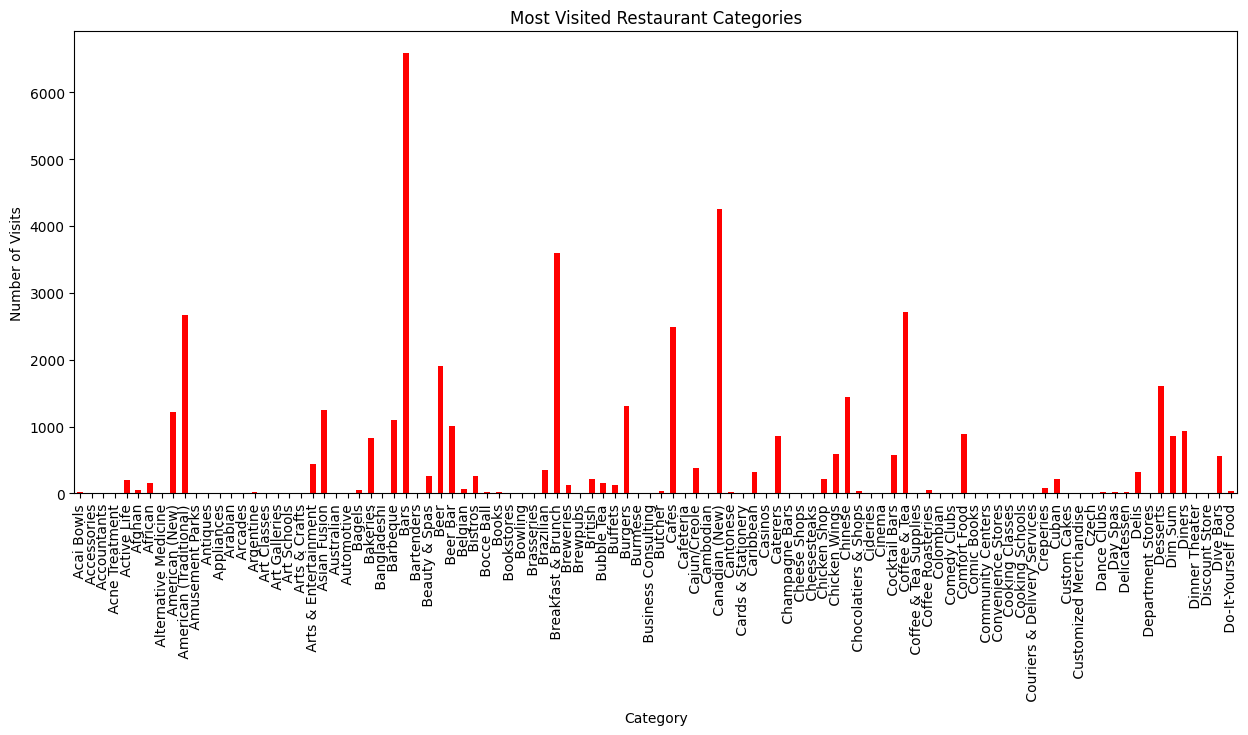

In [35]:
category_counts = ratings_review[attribute_restos].sum()

# Mengambil 20 business_id yang paling sering dikunjungi
top_20_category = category_counts.head(100)

# Membuat bar chart
plt.figure(figsize=(15, 6))
top_20_category.plot(kind='bar', color='r')
plt.xlabel('Category')
plt.ylabel('Number of Visits')
plt.title('Most Visited Restaurant Categories')
plt.show()

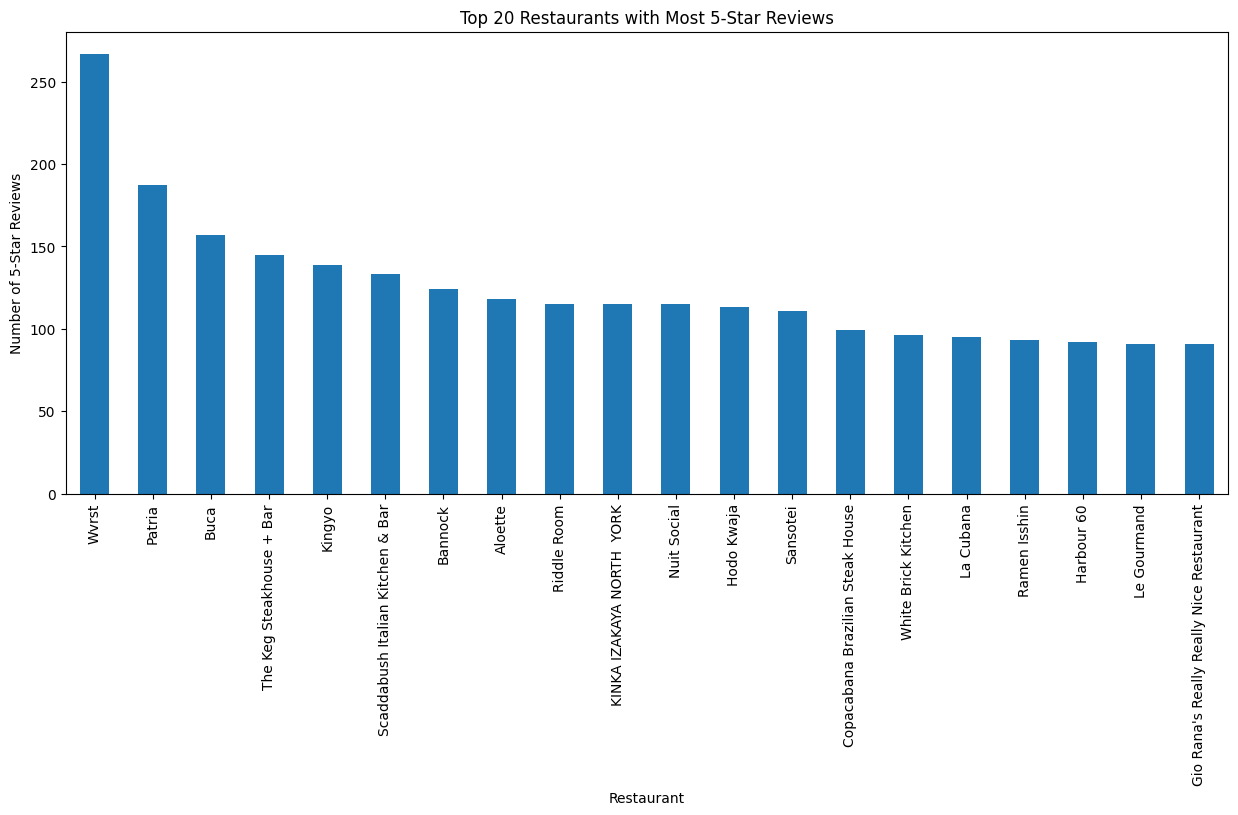

In [36]:
# Memfilter ulasan dengan bintang 5
five_star_reviews = ratings_review[ratings_review['stars'] == 5]

# Menghitung jumlah bintang 5 untuk setiap business_id
five_star_counts = five_star_reviews['name'].value_counts()

# Mengambil restoran yang mendapatkan paling banyak bintang 5
most_five_star_business = five_star_counts.head(20)

# Membuat bar chart
plt.figure(figsize=(15, 6))
most_five_star_business.plot(kind='bar')
plt.xlabel('Restaurant')
plt.ylabel('Number of 5-Star Reviews')
plt.title('Top 20 Restaurants with Most 5-Star Reviews')
plt.show()


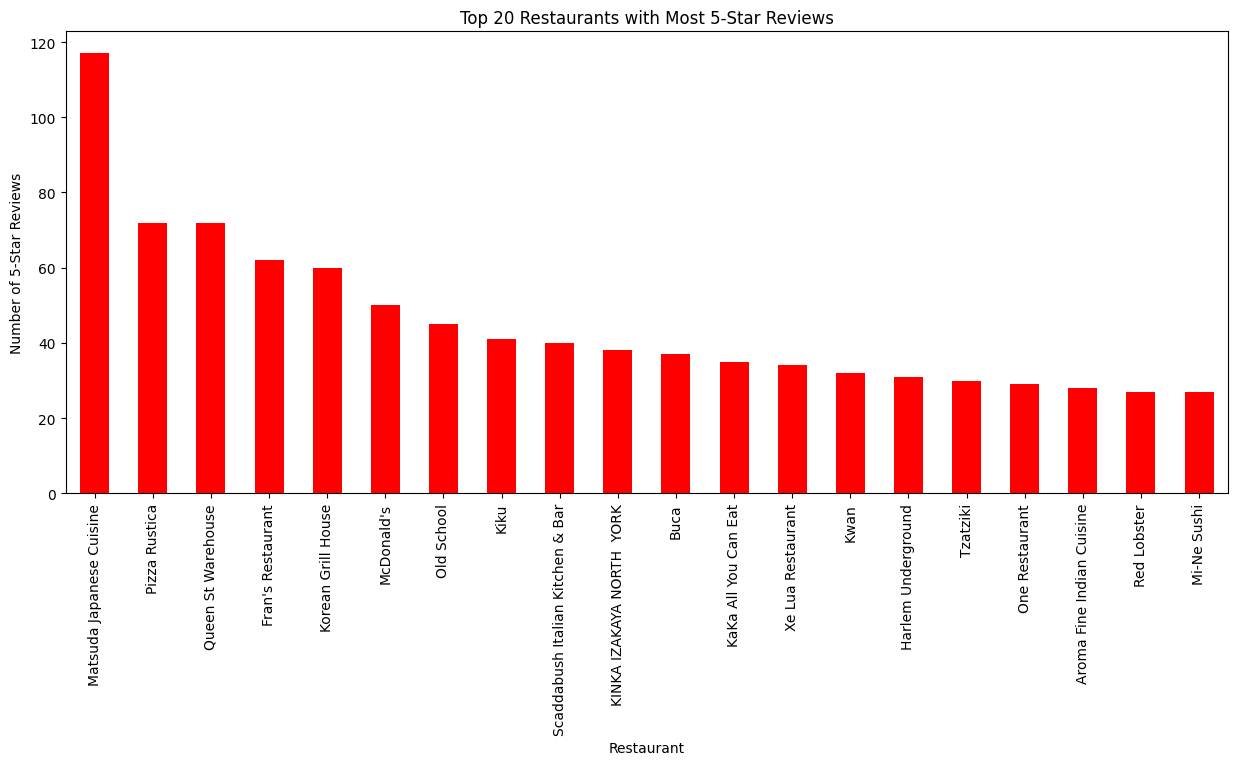

In [37]:
# Memfilter ulasan dengan bintang 5
five_star_reviews = ratings_review[ratings_review['stars'] == 1]

# Menghitung jumlah bintang 5 untuk setiap business_id
five_star_counts = five_star_reviews['name'].value_counts()

# Mengambil restoran yang mendapatkan paling banyak bintang 5
most_five_star_business = five_star_counts.head(20)

# Membuat bar chart
plt.figure(figsize=(15, 6))
most_five_star_business.plot(kind='bar', color='r')
plt.xlabel('Restaurant')
plt.ylabel('Number of 5-Star Reviews')
plt.title('Top 20 Restaurants with Most 5-Star Reviews')
plt.show()

# Menampilkan restoran yang mendapatkan paling banyak bintang 5
# print(most_five_star_business)

## Proses data text

In [38]:
# !python -m nltk.downloader stopwords

In [39]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
from collections import Counter

# # Unduh resource NLTK yang diperlukan
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')


In [40]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

### Cleaning text

In [41]:
def clean_text(text):
    ## Remove puncuation
    text = text.translate(string.punctuation)
    
    ## Convert words to lower case and split them
    text = text.lower().split()
    
    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [word for word in text if not word in stops and len(word) >= 3]
    
    text = " ".join(text)
    
    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", "  ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = re.sub(r";", " ; ", text)
    return text

In [42]:
ratings_review['text'] = ratings_review['text'].apply(clean_text)
ratings_review['text']

0        heart chinatown discovered enroute kensington ...
1        super excited bring boyfriend scaddabush locat...
2        excellent food service ambiance tapas truly in...
3        absolutely favorite mushroom pizza city great ...
4        couple times excellent food good prices love t...
                               ...                        
38412    dirty dirty dirty store maybe mcdonald like ca...
38413    quality sushi nothing special could pick anoth...
38414    best brunch nice traditional decoration music ...
38415    perfect place snacks tried curry fish balls ge...
38416    beers around world served glass proper consump...
Name: text, Length: 38417, dtype: object

### Lemmatize and tokenize data

In [43]:
# from nltk.corpus import wordnet
# from collections import Counter
# def get_pos(word):
#     """Mengambil POS tag untuk lematisasi yang tepat"""
#     from nltk.corpus import wordnet
#     tag = nltk.pos_tag([word])[0][1][0].upper()
#     tag_dict = {"J": wordnet.ADJ,
#                 "N": wordnet.NOUN,
#                 "V": wordnet.VERB,
#                 "R": wordnet.ADV}
#     return tag_dict.get(tag, wordnet.NOUN)

In [44]:
from nltk.corpus import wordnet
from collections import Counter
def get_pos( word ):
    w_synsets = wordnet.synsets(word)

    pos_counts = Counter()
    pos_counts["n"] = len(  [ item for item in w_synsets if item.pos()=="n"]  )
    pos_counts["v"] = len(  [ item for item in w_synsets if item.pos()=="v"]  )
    pos_counts["a"] = len(  [ item for item in w_synsets if item.pos()=="a"]  )
    pos_counts["r"] = len(  [ item for item in w_synsets if item.pos()=="r"]  )
    
    most_common_pos_list = pos_counts.most_common(4)
    return most_common_pos_list[0][0]

In [45]:
def preprocessing(text):
    """Fungsi untuk melakukan preprocessing pada teks ulasan"""
    # Tokenisasi
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]

    # Lematisasi
    lmtzr = WordNetLemmatizer()
    tokens = [lmtzr.lemmatize(x, get_pos(x)) for x in tokens]

    return ' '.join(tokens)

In [46]:
ratings_review['text'] = ratings_review['text'].apply(preprocessing)

In [47]:
ratings_review['text']

0        heart chinatown discover enroute kensington ma...
1        super excite bring boyfriend scaddabush locati...
2        excellent food service ambiance tapa truly inf...
3        absolutely favorite mushroom pizza city great ...
4        couple time excellent food good price love tea...
                               ...                        
38412    dirty dirty dirty store maybe mcdonald like ca...
38413    quality sushi nothing special could pick anoth...
38414    best brunch nice traditional decoration music ...
38415    perfect place snack try curry fish ball get on...
38416    beer around world serve glass proper consumpti...
Name: text, Length: 38417, dtype: object

In [48]:
# creating a bag of words which consist of entire preprocessed review text and fiting it
#%%time

vectorizer_reviews = CountVectorizer(max_features=500, min_df=2, max_df=0.8)
X_reviews = vectorizer_reviews.fit_transform(ratings_review['text']).toarray()

In [49]:
# print(vectorizer_reviews.get_feature_names_out())

In [50]:
pd.DataFrame(X_reviews)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0,0,2,0,0,0,0,0,0,0,...,1,0,2,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,2,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38412,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
38413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38415,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [51]:
print(X_reviews.shape)

(38417, 500)


In [52]:
# df_txt = ratings_review[['text']]
# df_txt.to_csv('text.csv', index=False) 

 ## Proses data numerik

In [53]:
# create a user-item matrix
# rating_crosstab = ratings_review.pivot_table(values='stars', index='user_id', columns='name', fill_value=0)
# rating_crosstab

In [54]:
cols = list(ratings_review.columns)
cols.append(cols.pop(cols.index('stars')))
ratings_review = ratings_review[cols]
ratings_review.head()


,user_id,business_id,text,username,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,...,Vietnamese,Waffles,Whiskey Bars,Wine Bars,Wineries,Women's Clothing,Yelp Events,user_encod,business_encod,stars
0,TZQSUDDcA4ek5gBd6BzcjA,qUWqjjjfpB2-4P3He5rsKw,heart chinatown discover enroute kensington ma...,Cecilia,-0.016097,0.062891,-0.09592,-0.003809,-0.113183,-0.044620,...,0,0,0,0,0,0,0,10462,815,4
1,iFEM16O5BeKvf_AHs6NzUQ,9Eghhu_LzEJgDKNgisf3rg,super excite bring boyfriend scaddabush locati...,Mer,-0.136428,-0.154409,-0.09592,-0.092920,-0.113183,-0.148794,...,0,0,0,1,0,0,0,15826,152,3
2,Eg_VTAQwK3CxYTORNRWd2g,4m_hApwQ054v3ue_OxFmGw,excellent food service ambiance tapa truly inf...,Lorena,-0.136428,-0.154409,-0.09592,-0.092920,-0.113183,-0.138376,...,0,0,0,0,0,0,0,5391,90,5
3,IIE2OX5haarGNefY23R8BA,jM6JjZXFAQQANwdlEwbH3g,absolutely favorite mushroom pizza city great ...,Elaine,-0.136428,-0.154409,-0.09592,-0.092920,-0.113183,-0.148794,...,0,0,0,0,0,0,0,6635,713,5
4,RRhco4irDXPk5EJmvuwr2w,PMPMHHLe9vFzcR67iCjgLA,couple time excellent food good price love tea...,Ish,-0.136428,-0.154409,-0.09592,-0.092920,-0.113183,-0.148794,...,0,0,0,0,0,0,0,9719,367,5


### Total sparsity data

In [55]:
total_entries = ratings_review['user_encod'].nunique() * ratings_review['business_encod'].nunique()
non_zero_entries = len(ratings_review)

sparsity = 1 - (non_zero_entries / total_entries)

print(f"Sparsity: {sparsity * 100:.2f}%")

Sparsity: 99.82%


In [56]:
ratings_review.shape

(38417, 573)

In [57]:
# print(ratings_review[attribute_users])

In [59]:
# ratings_review.to_excel('ratings.xlsx', index=False)

## Modelling

## Splitting data

In [60]:
ratings_review[attribute_restos]

,Acai Bowls,Accessories,Accountants,Acne Treatment,Active Life,Afghan,African,Alternative Medicine,American (New),American (Traditional),...,Ukrainian,Vegan,Vegetarian,Vietnamese,Waffles,Whiskey Bars,Wine Bars,Wineries,Women's Clothing,Yelp Events
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38412,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38415,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
user_ids = ratings_review[['user_encod']].values
restaurant_ids = ratings_review[['business_encod']].values
user_features = ratings_review[attribute_users].values
restaurant_features = ratings_review[attribute_restos].values
user_feature_count = len(attribute_users)
restaurant_feature_count = len(attribute_restos)

In [62]:
ratings_review

,user_id,business_id,text,username,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,...,Vietnamese,Waffles,Whiskey Bars,Wine Bars,Wineries,Women's Clothing,Yelp Events,user_encod,business_encod,stars
0,TZQSUDDcA4ek5gBd6BzcjA,qUWqjjjfpB2-4P3He5rsKw,heart chinatown discover enroute kensington ma...,Cecilia,-0.016097,0.062891,-0.095920,-0.003809,-0.113183,-0.044620,...,0,0,0,0,0,0,0,10462,815,4
1,iFEM16O5BeKvf_AHs6NzUQ,9Eghhu_LzEJgDKNgisf3rg,super excite bring boyfriend scaddabush locati...,Mer,-0.136428,-0.154409,-0.095920,-0.092920,-0.113183,-0.148794,...,0,0,0,1,0,0,0,15826,152,3
2,Eg_VTAQwK3CxYTORNRWd2g,4m_hApwQ054v3ue_OxFmGw,excellent food service ambiance tapa truly inf...,Lorena,-0.136428,-0.154409,-0.095920,-0.092920,-0.113183,-0.138376,...,0,0,0,0,0,0,0,5391,90,5
3,IIE2OX5haarGNefY23R8BA,jM6JjZXFAQQANwdlEwbH3g,absolutely favorite mushroom pizza city great ...,Elaine,-0.136428,-0.154409,-0.095920,-0.092920,-0.113183,-0.148794,...,0,0,0,0,0,0,0,6635,713,5
4,RRhco4irDXPk5EJmvuwr2w,PMPMHHLe9vFzcR67iCjgLA,couple time excellent food good price love tea...,Ish,-0.136428,-0.154409,-0.095920,-0.092920,-0.113183,-0.148794,...,0,0,0,0,0,0,0,9719,367,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38412,CWwIBuK3VMtKrk_OlnWZkA,SNWlgY-hTUr6h2kEee6gCA,dirty dirty dirty store maybe mcdonald like ca...,Rainier,-0.103610,0.062891,-0.007763,0.085302,-0.113183,-0.107124,...,0,0,0,0,0,0,0,4633,417,2
38413,P7_rgg3TbFEM2oUBQHE52A,v9DncDynhn7f-RBURtcSFw,quality sushi nothing special could pick anoth...,Mj,-0.136428,-0.154409,-0.095920,-0.092920,-0.113183,-0.148794,...,0,0,0,0,0,0,0,8918,898,3
38414,FzBKfweJgR2JlkTsOMni_w,1DtyA7pnc66hTkv64lKlzw,best brunch nice traditional decoration music ...,B,-0.136428,-0.154409,-0.095920,-0.092920,-0.113183,-0.148794,...,0,0,0,0,0,0,0,5839,31,5
38415,25qioKv_dsAb7Ozn6h4cug,qnfFdA-Ij8jpCPk6IV6igg,perfect place snack try curry fish ball get on...,Phoebe,-0.136428,-0.154409,-0.095920,-0.092920,-0.113183,-0.127959,...,0,0,0,0,0,0,0,1079,822,4


In [63]:
from sklearn.model_selection import train_test_split
X = np.hstack((user_ids, restaurant_ids, user_features, restaurant_features, X_reviews))
y = ratings_review['stars'].values

X_train_keras, X_test_keras, y_train_keras, y_test_keras = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_keras.shape, X_test_keras.shape, y_train_keras.shape, y_test_keras.shape

((30733, 1067), (7684, 1067), (30733,), (7684,))

In [64]:
max_text_length = X_reviews.shape[1]
max_text_length

500

In [65]:
user_ids_train = X_train_keras[:, 0]
restaurant_ids_train = X_train_keras[:, 1]
user_features_train = X_train_keras[:, 2:13]  
restaurant_features_train = X_train_keras[:, 13:567]  
reviews_train = X_train_keras[:, 567:]

user_ids_val = X_test_keras[:, 0]
restaurant_ids_val = X_test_keras[:, 1]
user_features_val = X_test_keras[:, 2:13]  
restaurant_features_val = X_test_keras[:, 13:567]
reviews_val = X_test_keras[:, 567:]

In [66]:
print(restaurant_features_train.shape)

(30733, 554)


In [67]:
import tensorflow.keras.backend as K
K.clear_session()

2024-09-01 16:45:47.685422: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-01 16:45:47.685517: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-01 16:45:47.857397: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Model 1 (CNN IMPROVED)

In [68]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D, Dense, Activation, Lambda, Concatenate, Dot, Flatten, Reshape, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

def embedding_layer(x, n_items, n_factors, input_length):
    x = Embedding(input_dim=n_items, output_dim=n_factors, input_length=input_length, embeddings_regularizer=l2(0.01))(x)
    x = Conv1D(filters=16, kernel_size=3, activation='relu', padding='same', kernel_regularizer=l2(0.01))(x)
    x = GlobalMaxPooling1D()(x)
    x = Dense(n_factors)(x)
    return x

def feature_embedding_layer(input_shape, n_factors):
    x = Input(shape=input_shape)
    x_embedded = Dense(n_factors)(x)
    x_embedded = Reshape((1, n_factors))(x_embedded)  # Mengubah menjadi (1, n_factors) untuk Conv1D
    x_embedded = Conv1D(filters=16, kernel_size=3, activation='relu', padding='same', kernel_regularizer=l2(0.01))(x_embedded)
    x_embedded = GlobalMaxPooling1D()(x_embedded)
    x_embedded = Dense(n_factors)(x_embedded)
    
    
    return Model(inputs=x, outputs=x_embedded)

def root_mean_squared_error(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

def Recommender_CNN(n_users, n_rests, n_factors, min_rating, max_rating, max_text_length, user_feature_count, restaurant_feature_count):
    # User input and embeddings
    user = Input(shape=(1,), name='user')
    user_emb = embedding_layer(user, n_users, n_factors, input_length=1)
    
    user_bias = Embedding(input_dim=n_users, output_dim=1, input_length=1, embeddings_regularizer=l2(0.01))(user)
    user_bias = Flatten()(user_bias)

    # User feature input and embeddings
    user_features = Input(shape=(user_feature_count,), name='user_features')
    user_feature_emb = feature_embedding_layer((user_feature_count,), n_factors)(user_features)

    # Restaurant input and embeddings
    restaurant = Input(shape=(1,), name='restaurant')
    rest_emb = embedding_layer(restaurant, n_rests, n_factors, input_length=1)
    
    rest_bias = Embedding(input_dim=n_rests, output_dim=1, input_length=1, embeddings_regularizer=l2(0.01))(restaurant)
    rest_bias = Flatten()(rest_bias)

    # Restaurant feature input and embeddings
    restaurant_features = Input(shape=(restaurant_feature_count,), name='restaurant_features')
    rest_feature_emb = feature_embedding_layer((restaurant_feature_count,), n_factors)(restaurant_features)

    # Text review input and embeddings
    review_text = Input(shape=(max_text_length,), name='review_text')
    review_emb = Embedding(input_dim=5000, output_dim=64, input_length=max_text_length)(review_text)
    review_conv = Conv1D(filters=16, kernel_size=3, activation='relu', padding='same', kernel_regularizer=l2(0.01))(review_emb)
    review_pool = GlobalMaxPooling1D()(review_conv)
    review_dense = Dense(n_factors, activation='relu')(review_pool)

    # Dot product of user and restaurant embeddings
    dot_product = Dot(axes=1)([user_emb, rest_emb])
    dot_product_flat = Flatten()(dot_product)

    # Concatenate all embeddings and biases
    concat = Concatenate()([dot_product_flat, Flatten()(user_bias), Flatten()(rest_bias), user_feature_emb, rest_feature_emb, review_dense])

    # Add a Dense layer, activation, and output layer
    dense = Dense(64, activation='relu')(concat)
    output = Dense(1, activation='sigmoid')(dense) 
    output = Lambda(lambda x: x * (max_rating - min_rating) + min_rating)(output)

    # Build and compile the model
    model_CNN = Model(inputs=[user, restaurant, user_features, restaurant_features, review_text], outputs=output)
    model_CNN.compile(loss=root_mean_squared_error, optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=[tf.keras.metrics.RootMeanSquaredError()])

    return model_CNN



In [69]:
# from tensorflow.keras.optimizers import SGD

# def Recommender_CNN_SGD(n_users, n_rests, n_factors, min_rating, max_rating, max_text_length, user_feature_count, restaurant_feature_count):
#     # User input and embeddings
#     user = Input(shape=(1,), name='user')
#     user_emb = embedding_layer(user, n_users, n_factors, input_length=1)
    
#     user_bias = Embedding(input_dim=n_users, output_dim=1, input_length=1, embeddings_regularizer=l2(0.01))(user)
#     user_bias = Flatten()(user_bias)

#     # User feature input and embeddings
#     user_features = Input(shape=(user_feature_count,), name='user_features')
#     user_feature_emb = feature_embedding_layer((user_feature_count,), n_factors)(user_features)

#     # Restaurant input and embeddings
#     restaurant = Input(shape=(1,), name='restaurant')
#     rest_emb = embedding_layer(restaurant, n_rests, n_factors, input_length=1)
    
#     rest_bias = Embedding(input_dim=n_rests, output_dim=1, input_length=1, embeddings_regularizer=l2(0.01))(restaurant)
#     rest_bias = Flatten()(rest_bias)

#     # Restaurant feature input and embeddings
#     restaurant_features = Input(shape=(restaurant_feature_count,), name='restaurant_features')
#     rest_feature_emb = feature_embedding_layer((restaurant_feature_count,), n_factors)(restaurant_features)

#     # Text review input and embeddings
#     review_text = Input(shape=(max_text_length,), name='review_text')
#     review_emb = Embedding(input_dim=5000, output_dim=64, input_length=max_text_length)(review_text)
#     review_conv = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same', kernel_regularizer=l2(0.01))(review_emb)
#     review_pool = GlobalMaxPooling1D()(review_conv)
#     review_dense = Dense(n_factors, activation='relu')(review_pool)

#     # Dot product of user and restaurant embeddings
#     dot_product = Dot(axes=1)([user_emb, rest_emb])
#     dot_product_flat = Flatten()(dot_product)

#     # Concatenate all embeddings and biases
#     concat = Concatenate()([dot_product_flat, Flatten()(user_bias), Flatten()(rest_bias), user_feature_emb, rest_feature_emb, review_dense])

#     # Add a Dense layer, activation, and output layer
#     dense = Dense(64, activation='relu')(concat)
#     output = Dense(1, activation='sigmoid')(dense)
#     output = Lambda(lambda x: x * (max_rating - min_rating) + min_rating)(output)

#     # Build and compile the model with SGD optimizer
#     model_CNN = Model(inputs=[user, restaurant, user_features, restaurant_features, review_text], outputs=output)
    
#     # Configure SGD optimizer
#     sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=False)
    
#     model_CNN.compile(loss=root_mean_squared_error, optimizer=sgd, metrics=[tf.keras.metrics.RootMeanSquaredError()])

#     return model_CNN


In [70]:
model_CNN = Recommender_CNN(n_users, n_rests, n_factors, min_rating, max_rating, max_text_length, user_feature_count, restaurant_feature_count)
# model_CNN = Recommender_CNN_SGD(n_users, n_rests, n_factors, min_rating, max_rating, max_text_length, user_feature_count, restaurant_feature_count)

model_CNN.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ user (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ restaurant          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 1, 64)     │  1,409,536 │ user[0][0]        │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 1, 64)     │     62,400 │ restaurant[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 1, 16)     │      3,088 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 1, 16)     │      3,088 │ embedding_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ review_text         │ (None, 500)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 16)        │          0 │ conv1d[0][0]      │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 16)        │          0 │ conv1d_2[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_4         │ (None, 500, 64)   │    320,000 │ review_text[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │      1,088 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 64)        │      1,088 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 1, 1)      │     22,024 │ user[0][0]        │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, 1, 1)      │        975 │ restaurant[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 500, 16)   │      3,088 │ embedding_4[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot (Dot)           │ (None, 1)         │          0 │ dense[0][0],      │
│                     │                   │            │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 1)         │          0 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 1)         │          0 │ embedding_3[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user_features       │ (None, 11)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 1,884,712 (7.19 MB)

 Trainable params: 1,884,712 (7.19 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
# user_emb = model_CNN.get_layer('embedding_27')
# user_emb.get_shape()

## Visual arsitektur model

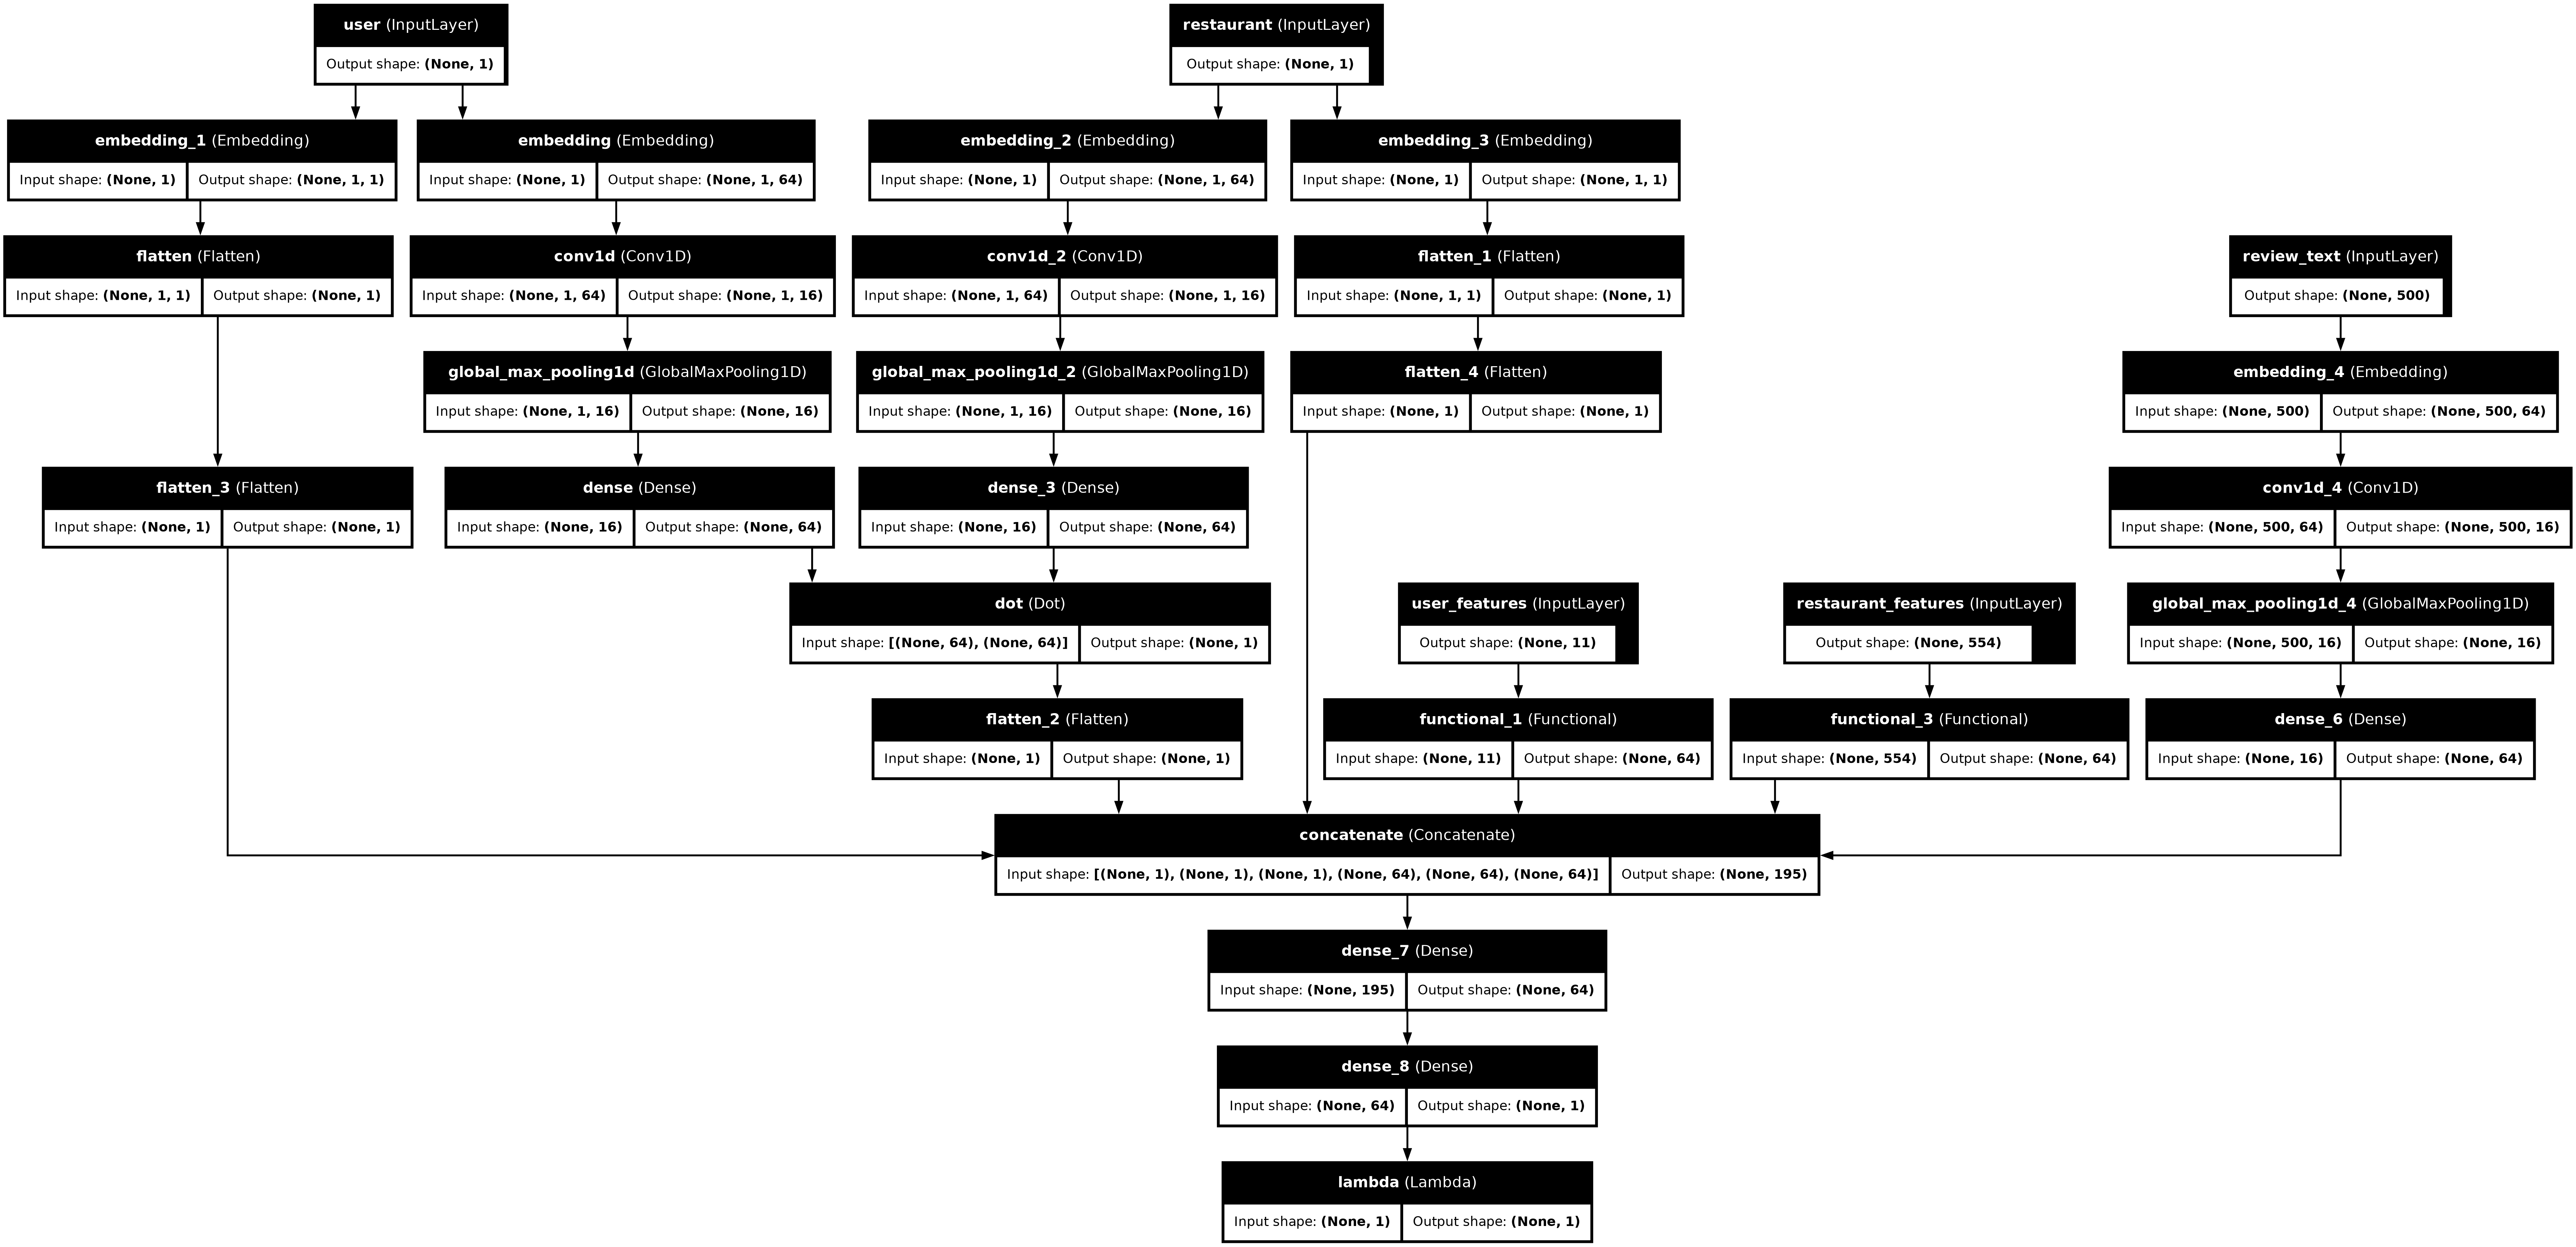

In [72]:
from tensorflow.keras.utils import plot_model

plot_model(model_CNN, to_file='model_CNN.png', show_shapes=True, show_layer_names=True)

## Training model

In [73]:
# from tensorflow.keras.callbacks import EarlyStopping
# # early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


history1 = model_CNN.fit(
    [user_ids_train, restaurant_ids_train, user_features_train, restaurant_features_train, reviews_train],
    y_train_keras,
    epochs=20,
    validation_data=(
        [user_ids_val, restaurant_ids_val, user_features_val, restaurant_features_val, reviews_val],
        y_test_keras
    ),
    batch_size=64,
#     callbacks=[early_stopping]
)

Epoch 1/20
 18/481 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 14.8398 - root_mean_squared_error: 1.4197  

I0000 00:00:1725209185.164229     116 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


481/481 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - loss: 9.3262 - root_mean_squared_error: 1.3109 - val_loss: 2.1928 - val_root_mean_squared_error: 1.2658
Epoch 2/20
481/481 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.8646 - root_mean_squared_error: 1.2501 - val_loss: 1.4475 - val_root_mean_squared_error: 1.2418
Epoch 3/20
481/481 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.3843 - root_mean_squared_error: 1.2206 - val_loss: 1.3106 - val_root_mean_squared_error: 1.2324
Epoch 4/20
481/481 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.2770 - root_mean_squared_error: 1.2126 - val_loss: 1.2628 - val_root_mean_squared_error: 1.2275
Epoch 5/20
481/481 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.2317 - root_mean_squared_error: 1.2004 - val_loss: 1.2434 - val_root_mean_squared_error: 1.2211
Epoch 6/20
481/481 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.2126 - root_mean_squared_error: 1.1919 - val_loss: 1.2333 - val_root_mean_squared_error: 1.2156
Epoch 7/20
481/481 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1

## Model 2 (CFDR)


In [74]:
# user_input = Input(shape=(1,), name='User_Input')
# user_embeddings = Embedding(input_dim=n_users, output_dim=n_factors, name='User_Embedding')(user_input)
# user_vector = Flatten(name='User_Vector')(user_embeddings)

# # Movie Embeddings
# resto_input = Input(shape=(1,), name='Resto_Input')
# resto_embeddings = Embedding(input_dim=n_rests, output_dim=n_factors, name='Resto_Embedding')(resto_input)
# resto_vector = Flatten(name='Resto_Vector')(resto_embeddings)



# # Concatenate Product
# merged_vectors = Concatenate()([user_vector, resto_vector])
# dense_layer_1 = Dense(100, activation='relu')(merged_vectors) 
# # dense_layer_1 = Dropout(0.25) (dense_layer_1)
# # batchnorm_layer_1 = BatchNormalization()(dense_layer_1)
# # dense_layer_2 = Dense(64, activation='relu')(merged_vectors)
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)



# result = Dense(1)(dense_layer_1)
# model_CFDR = Model([user_input, resto_input], result)
# model_CFDR.compile(loss=root_mean_squared_error, optimizer=optimizer,  metrics=[tf.keras.metrics.RootMeanSquaredError()])


In [75]:
# model_combine = Recommender_combine(n_users, n_rests, n_factors, min_rating, max_rating, max_text_length, user_feature_count, restaurant_feature_count)

# model_CFDR.summary()

In [76]:
# from tensorflow.keras.utils import plot_model

# plot_model(model_CFDR, to_file='model_2.png', show_shapes=True, show_layer_names=True)

In [77]:
# history2 = model_CFDR.fit([user_ids_train, restaurant_ids_train], y_train_keras, batch_size= 64, epochs=20, 
#                     verbose= 1, validation_data=([user_ids_val,restaurant_ids_val], y_test_keras))

## Model 3 (CFMDNN)

In [78]:
# from keras.layers import Input, Embedding, Flatten, Dot
# from keras.models import Model
# import tensorflow as tf

# # User Embeddings
# user_input = Input(shape=(1,), name='User_Input')
# user_embeddings = Embedding(input_dim=n_users, output_dim=n_factors, name='User_Embedding')(user_input)
# user_vector = Flatten(name='User_Vector')(user_embeddings)

# # Movie Embeddings
# resto_input = Input(shape=(1,), name='Resto_Input')
# resto_embeddings = Embedding(input_dim=n_rests, output_dim=n_factors, name='Resto_Embedding')(resto_input)
# resto_vector = Flatten(name='Resto_Vector')(resto_embeddings)

# # Dot Product
# merged_vectors = Dot(axes=1, name='Dot_Product')([user_vector, resto_vector])

# # Build the model
# model_CFMDNN = Model(inputs=[user_input, resto_input], outputs=merged_vectors)
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

# model_CFMDNN.compile(loss=root_mean_squared_error, optimizer=optimizer,  metrics=[tf.keras.metrics.RootMeanSquaredError()])

# history3 = model_CFMDNN.fit([user_ids_train, restaurant_ids_train], y_train_keras, batch_size= 64, epochs=20, 
#                     verbose= 1, validation_data=([user_ids_val,restaurant_ids_val], y_test_keras))


In [79]:
# from tensorflow.keras.utils import plot_model

# plot_model(model_CFMDNN, to_file='model_new.png', show_shapes=True, show_layer_names=True)

In [80]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Menemukan epoch terbaik berdasarkan nilai val_loss terendah
# best_epoch_model_CNN = np.argmin(history1.history['val_loss'])
# best_val_loss_model_CNN = history1.history['val_loss'][best_epoch_model_CNN]

# best_epoch_model_combine = np.argmin(history2.history['val_loss'])
# best_val_loss_model_combine = history2.history['val_loss'][best_epoch_model_combine]

# best_epoch_model1= np.argmin(history3.history['val_loss'])
# best_val_loss_model1 = history3.history['val_loss'][best_epoch_model1]


# # Plot training & validation loss values
# plt.figure(figsize=(12, 6))

# # Plot for model_CNN
# plt.plot(history1.history['loss'], marker='o', label='model_CNN_train_loss')
# plt.plot(history1.history['val_loss'], marker='o', label='model_CNN_val_loss')

# # Plot for model_combine
# plt.plot(history2.history['loss'], marker='o', label='model_CFMDNN_train_los')
# plt.plot(history2.history['val_loss'], marker='o', label='model_CFMDNN_val_los')

# plt.plot(history3.history['loss'], marker='o', label='model_CFDR_train_loss')
# plt.plot(history3.history['val_loss'], marker='o', label='model_CFDR_val_loss')

# # Menambahkan garis vertikal pada epoch terbaik
# plt.axvline(x=best_epoch_model_CNN, color='blue', linestyle='--', label=f'model_CNN_best_epoch: {best_epoch_model_CNN + 1}')
# plt.axvline(x=best_epoch_model_combine, color='green', linestyle='--', label=f'model_CFMDNN_best_epoch: {best_epoch_model_combine + 1}')
# plt.axvline(x=best_epoch_model1, color='yellow', linestyle='--', label=f'model_CFDR_best_epoch: {best_epoch_model1 + 1}')

# plt.title('Model Loss Comparison')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(loc='upper right')
# plt.grid(True)
# plt.show()


#### Save model

In [81]:
from tensorflow.keras.models import load_model
model_CNN.save("model_l2_HybridCNN.h5")

In [82]:
# from tensorflow.keras.models import load_model

# model_CNN_l2 = load_model('/kaggle/working/model_l2_HybridCNN.h5', custom_objects={'root_mean_squared_error': root_mean_squared_error}, compile=False)
# model_CNN_l2.compile(loss=root_mean_squared_error, optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=[tf.keras.metrics.RootMeanSquaredError()])

## Train With K_Cross Validation

In [83]:
from sklearn.model_selection import KFold

In [84]:
import numpy as np
import pandas as pd

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store RMSE scores
train_rmse_scores = []
val_rmse_scores = []
average_val_rmse_per_fold = []


fold = 1

for train_index, val_index in kf.split(X_train_keras):
    # Split data into train and validation sets
    print(f"Training Fold {fold}/{num_folds}")
    X_train, X_val = X_train_keras[train_index], X_train_keras[val_index]
    y_train, y_val = y_train_keras[train_index], y_train_keras[val_index]
    
    # Separate components of the data
    user_ids_train1 = X_train[:, 0]
    restaurant_ids_train1 = X_train[:, 1]
    user_features_train1 = X_train[:, 2:13]  
    restaurant_features_train1 = X_train[:, 13:567]  
    reviews_train1 = X_train[:, 567:]

    user_ids_val1 = X_val[:, 0]
    restaurant_ids_val1 = X_val[:, 1]
    user_features_val1 = X_val[:, 2:13]  
    restaurant_features_val1 = X_val[:, 13:567]
    reviews_val1 = X_val[:, 567:]
    
    # Initialize and compile the model
    model_CNN = Recommender_CNN(n_users, n_rests, n_factors, min_rating, max_rating, max_text_length=max_text_length, user_feature_count=user_feature_count, restaurant_feature_count=restaurant_feature_count)
    
    # Train the model
    history = model_CNN.fit(
        [user_ids_train1, restaurant_ids_train1, user_features_train1, restaurant_features_train1, reviews_train1], 
        y_train, 
        epochs=20,
        batch_size=64,
        validation_data=([user_ids_val1, restaurant_ids_val1, user_features_val1, restaurant_features_val1, reviews_val1], y_val),
        verbose=1
    )
    
    # Store the last RMSE of each fold
    train_rmse = history.history['root_mean_squared_error'][-1]
    val_rmse = history.history['val_root_mean_squared_error'][-1]
    train_rmse_scores.append(train_rmse)
    val_rmse_scores.append(val_rmse)
    
    # Calculate average validation RMSE for the current fold
    avg_val_rmse = np.mean(history.history['val_root_mean_squared_error'])
    average_val_rmse_per_fold.append(avg_val_rmse)
    print(f"Average Validation RMSE for Fold {fold}: {avg_val_rmse:.4f}")
    
    # Save history data for each fold
    fold_history_df = pd.DataFrame({
        'Epoch': list(range(1, len(history.history['root_mean_squared_error']) + 1)),
        'Train RMSE': history.history['root_mean_squared_error'],
        'Validation RMSE': history.history['val_root_mean_squared_error']
    })
    fold_history_df.to_excel(f'fold_{fold}_history.xlsx', index=False)
    
    fold += 1

# Save summary RMSE scores to Excel
rmse_df = pd.DataFrame({
    'Fold': range(1, num_folds + 1),
    'Train RMSE': train_rmse_scores,
    'Validation RMSE': val_rmse_scores,
    'Average Validation RMSE': average_val_rmse_per_fold
})
rmse_df.to_excel('rmse_scores.xlsx', index=False)


Training Fold 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
385/385 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - loss: 10.0620 - root_mean_squared_error: 1.3105 - val_loss: 2.7749 - val_root_mean_squared_error: 1.2650
Epoch 2/20
385/385 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 2.2681 - root_mean_squared_error: 1.2552 - val_loss: 1.5599 - val_root_mean_squared_error: 1.2373
Epoch 3/20
385/385 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.4934 - root_mean_squared_error: 1.2327 - val_loss: 1.3614 - val_root_mean_squared_error: 1.2222
Epoch 4/20
385/385 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.3348 - root_mean_squared_error: 1.2187 - val_loss: 1.2845 - val_root_mean_squared_error: 1.2170
Epoch 5/20
385/385 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.2670 - root_mean_squared_error: 1.2092 - val_loss: 1.2502 - val_root_mean_squared_error: 1.2127
Epoch 6/20
385/385 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.2425 - root_mean_squared_error: 1.2096 - val_loss: 1.2309 - val_root_mean_squared_error: 1.2053
Epoch 7/20
385/385 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/st

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

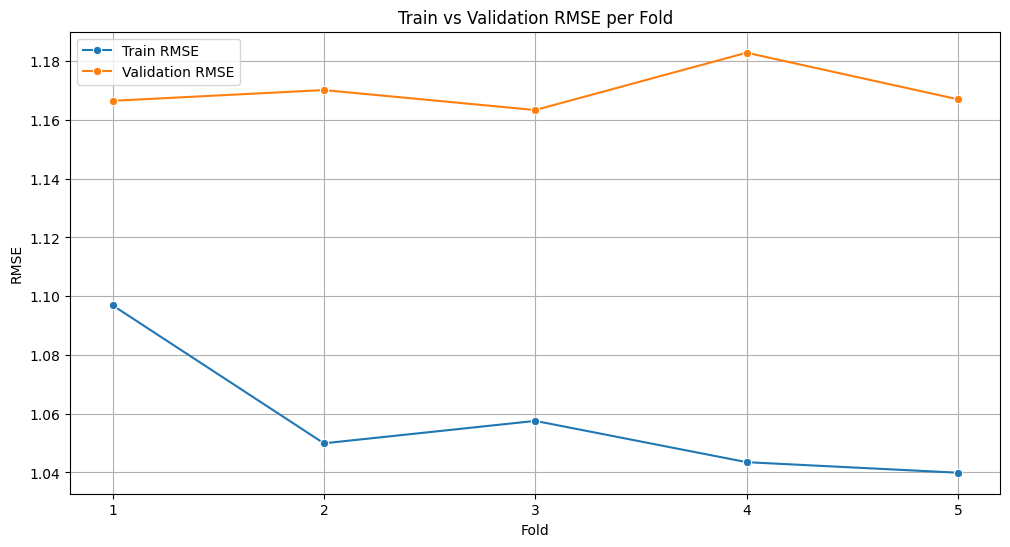

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

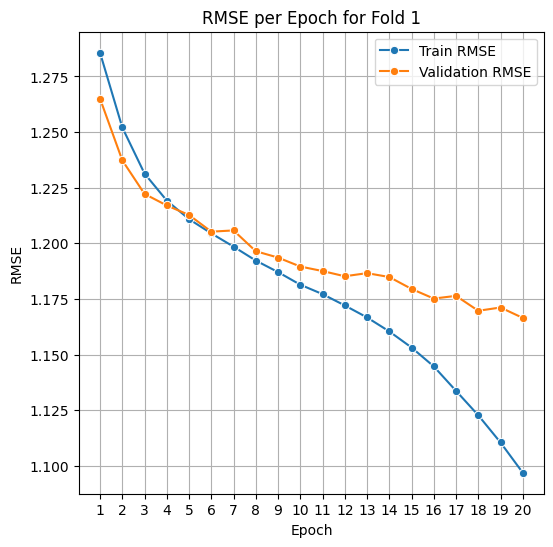

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

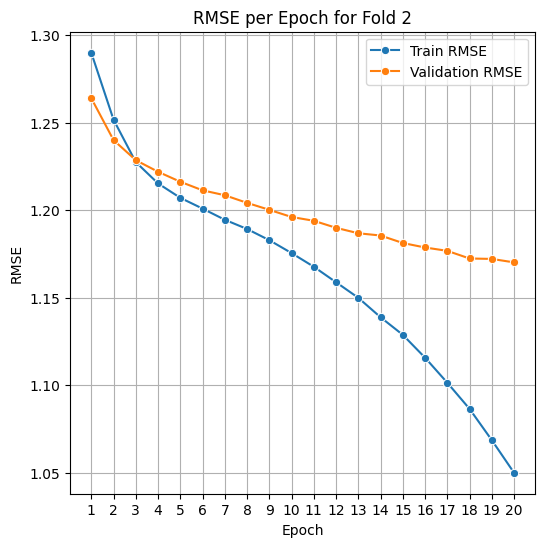

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

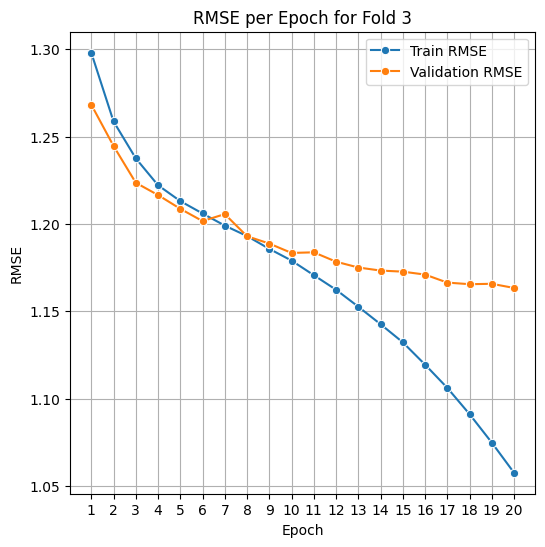

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

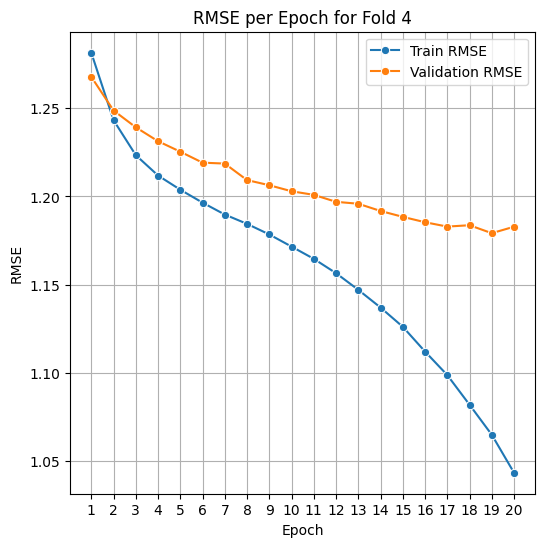

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

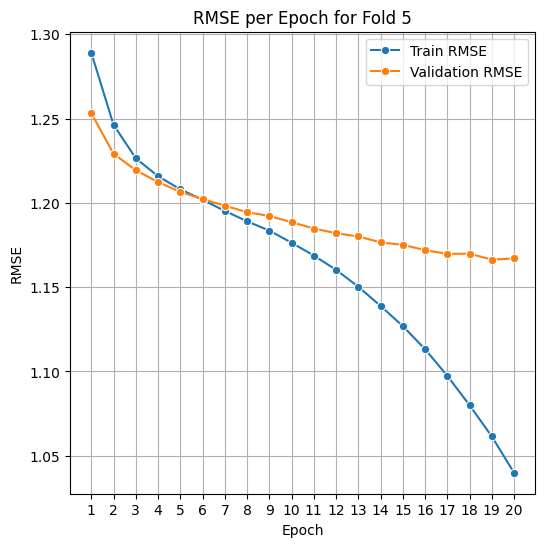

In [85]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Plotting Train and Validation RMSE per Fold
plt.figure(figsize=(12, 6))
sns.lineplot(x='Fold', y='Train RMSE', data=rmse_df, marker='o', label='Train RMSE')
sns.lineplot(x='Fold', y='Validation RMSE', data=rmse_df, marker='o', label='Validation RMSE')

plt.title('Train vs Validation RMSE per Fold')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.xticks(rmse_df['Fold'])
plt.legend()
plt.grid(True)
plt.show()

# Plotting the training history for each fold
for fold in range(1, num_folds + 1):
    fold_history_df = pd.read_excel(f'fold_{fold}_history.xlsx')
    
    plt.figure(figsize=(6, 6))
    sns.lineplot(x='Epoch', y='Train RMSE', data=fold_history_df, marker='o', label='Train RMSE')
    sns.lineplot(x='Epoch', y='Validation RMSE', data=fold_history_df, marker='o', label='Validation RMSE')
    
    plt.title(f'RMSE per Epoch for Fold {fold}')
    plt.xlabel('Epoch')
    plt.ylabel('RMSE')
    plt.xticks(range(1, len(fold_history_df['Epoch']) + 1))
    plt.legend()
    plt.grid(True)
    plt.show()


## Model with l2

In [86]:
# from sklearn.model_selection import KFold
# num_folds = 5
# kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
# # Initialize lists to store RMSE scores
# train_rmse_scores = []
# val_rmse_scores = []

# fold = 1

# for train_index, val_index in kf.split(X_train_keras):
#     # Split data into train and validation sets
#     print(f"Training Fold {fold}/{num_folds}")
#     X_train, X_val = X_train_keras[train_index], X_train_keras[val_index]
#     y_train, y_val = y_train_keras[train_index], y_train_keras[val_index]
    
    
#     # Separate components of the data
#     user_ids_train1 = X_train[:, 0]
#     restaurant_ids_train1 = X_train[:, 1]
#     user_features_train1 = X_train[:, 2:13]  
#     restaurant_features_train1 = X_train[:, 13:567]  
#     reviews_train1 = X_train[:, 567:]

#     user_ids_val1 = X_val[:, 0]
#     restaurant_ids_val1 = X_val[:, 1]
#     user_features_val1 = X_val[:, 2:13]  
#     restaurant_features_val1 = X_val[:, 13:567]
#     reviews_val1 = X_val[:, 567:]
    
#     # Initialize and compile the model
#     model_CNN = Recommender_CNN(n_users, n_rests, n_factors, min_rating, max_rating, max_text_length=max_text_length, user_feature_count=user_feature_count, restaurant_feature_count=restaurant_feature_count)
    
#     # Train the model
#     history = model_CNN_l2.fit(
#         [user_ids_train1, restaurant_ids_train1, user_features_train1, restaurant_features_train1, reviews_train1], 
#         y_train, 
#         epochs=20,
#         batch_size=64,
#         validation_data=([user_ids_val1, restaurant_ids_val1, user_features_val1, restaurant_features_val1, reviews_val1], y_val),
#         verbose=1
#     )
    
#     # Store the last RMSE of each fold
#     train_rmse = history.history['root_mean_squared_error'][-1]
#     val_rmse = history.history['val_root_mean_squared_error'][-1]
#     train_rmse_scores.append(train_rmse)
#     val_rmse_scores.append(val_rmse)
    
#     # Save history data for each fold
#     fold_history_df = pd.DataFrame({
#         'Epoch': list(range(1, len(history.history['root_mean_squared_error']) + 1)),
#         'Train RMSE': history.history['root_mean_squared_error'],
#         'Validation RMSE': history.history['val_root_mean_squared_error']
#     })
#     fold_history_df.to_excel(f'fold_{fold}_history2.xlsx', index=False)
    
#     fold += 1

# # Save summary RMSE scores to Excel
# rmse_df = pd.DataFrame({
#     'Fold': range(1, num_folds + 1),
#     'Train RMSE': train_rmse_scores,
#     'Validation RMSE': val_rmse_scores
# })
# rmse_df.to_excel('rmse_scores.xlsx', index=False)
    

In [87]:
for i in range(len(average_val_rmse_per_fold)):
    print(f"Fold {i+1}: Rata-rata Validation RMSE = {average_val_rmse_per_fold[i]:.4f}")

Fold 1: Rata-rata Validation RMSE = 1.1964
Fold 2: Rata-rata Validation RMSE = 1.1999
Fold 3: Rata-rata Validation RMSE = 1.1925
Fold 4: Rata-rata Validation RMSE = 1.2078
Fold 5: Rata-rata Validation RMSE = 1.1920


## Visualisasi train using k-fold

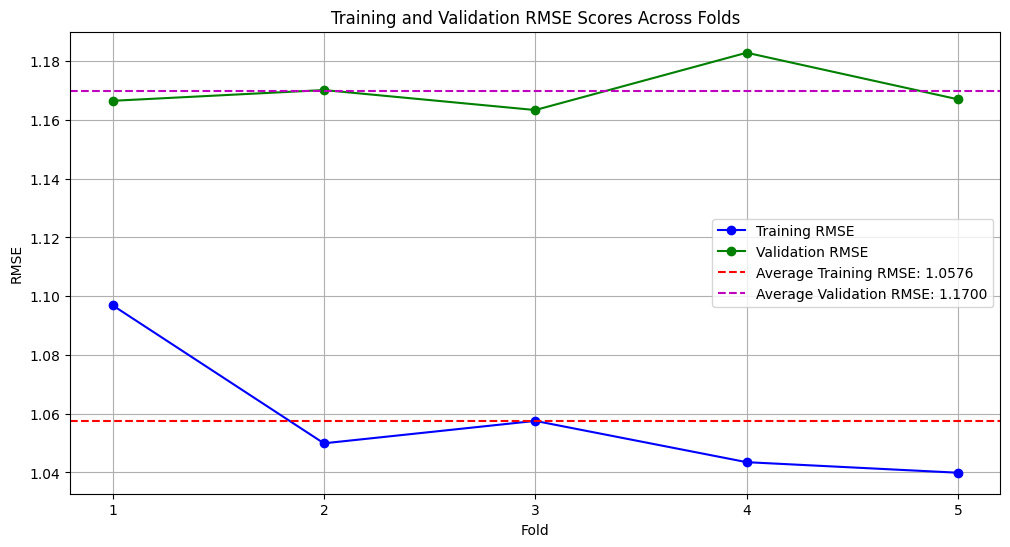

Average Training RMSE: 1.0576
Standard Deviation of Training RMSE: 0.0206
Average Validation RMSE: 1.1700
Standard Deviation of Validation RMSE: 0.0068


In [88]:
import matplotlib.pyplot as plt
# Calculate average RMSE and standard deviation
average_train_rmse = np.mean(train_rmse_scores)
std_train_rmse = np.std(train_rmse_scores)
average_val_rmse = np.mean(val_rmse_scores)
std_val_rmse = np.std(val_rmse_scores)

# Plotting RMSE scores for each fold
plt.figure(figsize=(12, 6))
plt.plot(range(1, num_folds + 1), train_rmse_scores, marker='o', linestyle='-', color='b', label='Training RMSE')
plt.plot(range(1, num_folds + 1), val_rmse_scores, marker='o', linestyle='-', color='g', label='Validation RMSE')
plt.title('Training and Validation RMSE Scores Across Folds')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.xticks(range(1, num_folds + 1))
plt.grid(True)

# Adding average RMSE lines
plt.axhline(y=average_train_rmse, color='r', linestyle='--', label=f'Average Training RMSE: {average_train_rmse:.4f}')
plt.axhline(y=average_val_rmse, color='m', linestyle='--', label=f'Average Validation RMSE: {average_val_rmse:.4f}')
plt.legend()

# Display the plot
plt.show()

# Print the average RMSE and standard deviation
print(f'Average Training RMSE: {average_train_rmse:.4f}')
print(f'Standard Deviation of Training RMSE: {std_train_rmse:.4f}')
print(f'Average Validation RMSE: {average_val_rmse:.4f}')
print(f'Standard Deviation of Validation RMSE: {std_val_rmse:.4f}')

## Testing model

In [89]:
# prediction
X_test_array = [user_ids_val, restaurant_ids_val, user_features_val, restaurant_features_val, reviews_val]
predictions1 = model_CNN.predict(X_test_array)

241/241 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [90]:
# pred = pd.DataFrame(df_test)
# pred.to_excel('output1.xlsx', index=False) 

In [91]:
# # create the df_test table with prediction results
df_test = pd.DataFrame(X_test_keras[:,0])
df_test.rename(columns={0: "user"}, inplace=True)
df_test['business'] = X_test_keras[:,1]
df_test['stars'] = y_test_keras
df_test['predictions'] = predictions1
df_test['error'] = df_test['stars'] - df_test['predictions']
df_test.sample(10)

,user,business,stars,predictions,error
1354,3335.0,817.0,2,2.752711,-0.752711
5184,1859.0,162.0,4,2.903260,1.096740
1611,4003.0,38.0,3,3.884187,-0.884187
2403,16347.0,735.0,3,3.646559,-0.646559
6069,20066.0,211.0,5,4.494241,0.505759
2449,1955.0,83.0,3,3.951895,-0.951895
771,17170.0,347.0,1,2.997187,-1.997187
5122,3231.0,265.0,3,3.700781,-0.700781
4931,19396.0,684.0,3,4.221752,-1.221752
7220,4254.0,906.0,3,4.287666,-1.287666


In [92]:
# Save summary RMSE scores to Excel
rmse_df = pd.DataFrame({
    'Fold': range(1, num_folds + 1),
    'Train RMSE': train_rmse_scores,
    'Validation RMSE': val_rmse_scores
})
rmse_df.to_excel('rmse_scores.xlsx', index=False)


In [93]:
# # Filter for user_id 1
# df_user_1 = df_test[df_test['user'] == 1]

# # Display the results
# print(df_user_1)

## Recommendations using Top-N

In [94]:
rated_restaurants = ratings_review[ratings_review['user_encod'] == 20]['business_encod'].tolist()
rated_restaurants

[573]

In [95]:
all_restaurants = ratings_review['business_encod'].unique().tolist()
all_restaurants

[815,
 152,
 90,
 713,
 367,
 277,
 876,
 870,
 50,
 881,
 886,
 84,
 490,
 122,
 556,
 73,
 628,
 684,
 767,
 132,
 184,
 843,
 207,
 952,
 317,
 944,
 255,
 2,
 476,
 770,
 889,
 12,
 879,
 214,
 211,
 383,
 602,
 199,
 598,
 877,
 357,
 603,
 236,
 723,
 163,
 19,
 578,
 449,
 410,
 273,
 570,
 634,
 154,
 852,
 179,
 128,
 792,
 771,
 730,
 817,
 138,
 890,
 708,
 510,
 758,
 515,
 675,
 354,
 560,
 669,
 704,
 444,
 97,
 645,
 407,
 614,
 529,
 109,
 387,
 423,
 546,
 887,
 623,
 338,
 160,
 659,
 933,
 942,
 36,
 307,
 878,
 915,
 238,
 18,
 806,
 140,
 572,
 812,
 755,
 562,
 133,
 421,
 652,
 468,
 573,
 668,
 430,
 210,
 43,
 265,
 735,
 347,
 77,
 633,
 715,
 225,
 165,
 66,
 747,
 288,
 363,
 551,
 391,
 470,
 828,
 217,
 759,
 425,
 164,
 477,
 16,
 459,
 585,
 268,
 64,
 711,
 291,
 808,
 212,
 651,
 426,
 932,
 680,
 961,
 729,
 901,
 527,
 343,
 726,
 121,
 402,
 543,
 492,
 522,
 763,
 388,
 60,
 691,
 625,
 632,
 813,
 51,
 851,
 464,
 222,
 87,
 380,
 203,
 341,
 227,

In [96]:
# Restoran yang belum pernah dinilai
def get_unrated_restaurants(user_id, ratings_review):
    rated_restaurants = ratings_review[ratings_review['user_encod'] == user_id]['business_encod'].tolist()
    all_restaurants = ratings_review['business_encod'].unique().tolist()
    unrated_restaurants = [rest_id for rest_id in all_restaurants if rest_id not in rated_restaurants]
    return unrated_restaurants

def get_restaurant_attributes(rest_id, df):
    rest_attributes = df.loc[df['business_encod'] == rest_id].to_dict('records')[0]
    restaurant_name = rest_attributes['name']  # Mengambil nama restoran
    restaurant_only_attributes = {key: value for key, value in rest_attributes.items() if key in attribute_resto}
    # Filter hanya kunci yang memiliki nilai 1
    filtered_attributes = {key: value for key, value in restaurant_only_attributes.items() if value == 1}
    return restaurant_name, filtered_attributes

In [97]:
user_inp = 20

top_10_indices = predictions1.flatten().argsort()[-10:][::-1]
top_10_restaurants = restaurant_ids[top_10_indices].flatten()
unrated_restaurants = get_unrated_restaurants(user_inp, ratings_review)


In [98]:
# Filter untuk mendapatkan hanya restoran yang belum dinilai
unrated_recommendations = [(rest_id, pred) for rest_id, pred in zip(top_10_restaurants, predictions1) if rest_id in unrated_restaurants]
unrated_recommendations = sorted(unrated_recommendations, key=lambda x: x[1], reverse=True)

# Mengambil top N dari rekomendasi yang belum dinilai
top_n_unrated_recommendations = unrated_recommendations[:10]
top_n_unrated_recommendations


[(910, array([4.414956], dtype=float32)),
 (34, array([4.222549], dtype=float32)),
 (870, array([4.02868], dtype=float32)),
 (634, array([3.9087412], dtype=float32)),
 (750, array([3.5713415], dtype=float32)),
 (274, array([3.4052138], dtype=float32)),
 (608, array([3.2224007], dtype=float32)),
 (423, array([2.9615865], dtype=float32)),
 (90, array([2.712759], dtype=float32)),
 (203, array([2.5679278], dtype=float32))]

In [99]:
subset_resto[subset_resto['business_id']=='aEnoF_79jQE83s-I756n8w']

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
7200,aEnoF_79jQE83s-I756n8w,Thor Espresso Bar,35 Bathurst Street,Toronto,ON,M5V 2P2,43.64207,-79.401691,4.0,84,1,"{'RestaurantsReservations': 'False', 'Restaura...","Food, Restaurants, Cafes, Coffee & Tea, Bakeries","{'Monday': '7:0-18:0', 'Tuesday': '7:0-18:0', ..."


In [100]:
ratings_review[ratings_review['user_encod'] == 20]

,user_id,business_id,text,username,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,...,Vietnamese,Waffles,Whiskey Bars,Wine Bars,Wineries,Women's Clothing,Yelp Events,user_encod,business_encod,stars
3777,-2dBwxiwH8VtR-EwHrVXug,aEnoF_79jQE83s-I756n8w,best latte ever toronto plus breakfast burrito...,scott,-0.136428,-0.154409,-0.09592,-0.09292,-0.113183,-0.148794,...,0,0,0,0,0,0,0,20,573,5


In [101]:
# Menampilkan rekomendasi
print("Top {} Restaurant Recommendations for User ID {}:".format(10, user_inp))
for i, (rest_id, pred) in enumerate(top_n_unrated_recommendations):
    restaurant_name, attributes = get_restaurant_attributes(rest_id, ratings_review)
    print(f"Rank {i+1}: {restaurant_name} (Restaurant ID: {rest_id}), Predicted Rating: {pred}")
    print(f"Atribut Restoran:")
    if attributes:
        for key in attributes.keys():
            print(f"  {key}")
    else:
        print("  No attributes with value 1")
    print("\n")

Top 10 Restaurant Recommendations for User ID 20:
Rank 1: JP Sushi (Restaurant ID: 910), Predicted Rating: [4.414956]
Atribut Restoran:
   Japanese
   Sushi Bars


Rank 2: Dessert Lady Café (Restaurant ID: 34), Predicted Rating: [4.222549]
Atribut Restoran:
   Bakeries
   Breakfast & Brunch
   Desserts
   Restaurants
  Food


Rank 3: Queen St Warehouse (Restaurant ID: 870), Predicted Rating: [4.02868]
Atribut Restoran:
   American (Traditional)
   Bars
   Dive Bars
   Nightlife
   Restaurants
  Comfort Food


Rank 4: Korean Grill House (Restaurant ID: 634), Predicted Rating: [3.9087412]
Atribut Restoran:
   Restaurants
  Korean


Rank 5: KOKO! Share Bar (Restaurant ID: 750), Predicted Rating: [3.5713415]
Atribut Restoran:
   Asian Fusion
   Japanese
   Restaurants
  Korean


Rank 6: C Stores (Restaurant ID: 274), Predicted Rating: [3.4052138]
Atribut Restoran:
   Convenience Stores
   Delis
   Food


Rank 7: The 6 Burger Bar (Restaurant ID: 608), Predicted Rating: [3.2224007]
Atribut R

## Evaluasi model

In [102]:
from sklearn.metrics import mean_squared_error
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

preds_model_CNN = model_CNN.predict([user_ids_val, restaurant_ids_val, user_features_val, restaurant_features_val, reviews_val])
# preds_model_combine = model_CFMDNN.predict([user_ids_val, restaurant_ids_val])
# pred_model_DCF = model_CFDR.predict([user_ids_val, restaurant_ids_val])

rmse_model_CNN = calculate_rmse(y_test_keras, preds_model_CNN)
# rmse_model_combine = calculate_rmse(y_test_keras, preds_model_combine)
# rmse_model_DCF = calculate_rmse(y_test_keras, pred_model_DCF)

print("RMSE CNN model:", rmse_model_CNN)
# print("RMSE combine model:", rmse_model_combine)
# print("RMSE DCF model:", rmse_model_DCF)

241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
RMSE CNN model: 1.1720152176362255


In [103]:
# plot_x = ['RMSE CNN', 'RMSE CFMDNN', 'RMSE CFDR']
# plot_y = [rmse_model_CNN, rmse_model_combine, rmse_model_DCF]
# plt.bar(plot_x,plot_y)
# plt.show()

In [104]:
from sklearn.metrics import mean_absolute_error
mae_CNN = mean_absolute_error(y_test_keras, preds_model_CNN)
# mae_combine = mean_absolute_error(y_test_keras, preds_model_combine)
print("MAE CNN model:", mae_CNN)
# print("MAE CNNCF combine model:", mae_combine)

MAE CNN model: 0.9479815160340781


In [105]:
# x_pred = [user_ids_val, restaurant_ids_val]
# predictions2 = model_CFDR.predict(x_pred)
# predictions2

In [106]:
# df_test = pd.DataFrame(X_test_keras[:,0])
# df_test.rename(columns={0: "user"}, inplace=True)
# df_test['restarant'] = X_test_keras[:,1]
# df_test['Rating'] = y_test_keras
# df_test["predictions"] = np.mean(predictions2, axis=1)
# # Calculate the error
# df_test['error'] = df_test['Rating'] - df_test['predictions']
# df_test.sample(5)

# # df_test.shape

In [107]:
# # Visualize the distribution of errors with a histogram
# plt.figure(figsize=(12, 6))
# plt.hist(df_test['error'], bins=50, color='blue', edgecolor='black', alpha=0.7)
# plt.xlabel('Prediction Error')
# plt.ylabel('Frequency')
# plt.title('Distribution of Prediction Errors')
# plt.grid(True)
# plt.show()



# # Print the shape of the DataFrame
# print(df_test.shape)

In [108]:
import pandas as pd

# Ambil riwayat pelatihan dari objek history
history_dict = history.history

# Konversi riwayat pelatihan menjadi DataFrame
history_df = pd.DataFrame(history_dict)

# Simpan DataFrame ke file CSV
history_df.to_excel('training_history.xlsx', index=False)

# print("Hasil training telah disimpan ke file training_history.csv")


## Recommendarion using Cosine sim

## Recommendation item-based

In [109]:
emb_rest = model_CNN.get_layer('embedding_27')

In [110]:
# # # Extract embeddings
emb_rest = model_CNN.get_layer('embedding_27')
# emb_user = model_CNN.get_layer('embedding_25')
                    
# emb_weights_rest = emb_rest.get_weights()[0]
# emb_weights_user = emb_user.get_weights()[0]



# print("The shape of embedded weights: ", emb_weights_rest.shape)
# print("The length of embedded weights: ", len(emb_weights_rest))

In [111]:
# user_emb_weights = emb_weights_user / np.linalg.norm(emb_weights_user, axis=1).reshape((-1, 1))
# len(user_emb_weights)

In [112]:
# # Membuat DataFrame dari bobot embedding
# user_ids = ratings_review["user_id"].unique()
# len(user_ids)

In [113]:
# # normalize and reshape embedded weights
# emb_weights_rest = emb_weights_rest / np.linalg.norm(emb_weights_rest, axis = 1).reshape((-1, 1))
# len(emb_weights_rest)

In [114]:
# # get all unique business_ids (restaurants)
# rest_id_emb = ratings_review["business_id"].unique()
# len(rest_id_emb)

In [115]:
# user_pd = pd.DataFrame(user_emb_weights)
# user_pd["user_id"] = user_ids
# user_pd = user_pd.set_index("user_id")
# user_pd

In [116]:
# rest_pd = pd.DataFrame(emb_weights_rest)
# rest_pd["business_id"] = rest_id_emb
# rest_pd = rest_pd.set_index("business_id")
# rest_pd

In [117]:
# # # merging rest_pd and temp tables to get the name of the restaurants.
# temp = ratings_review[['business_id', 'name']].drop_duplicates()
# df_recommend = pd.merge(rest_pd, temp, on='business_id')
# df_recommend

In [118]:
# # # merging rest_pd and temp tables to get the name of the restaurants.
# temp2 = ratings_review[['user_id', 'username']].drop_duplicates()
# df_recommend2 = pd.merge(user_pd, temp2, on='user_id')
# df_recommend2

In [119]:
# # # exrtract the target restaurant from the df_recommend table
# target = df_recommend[df_recommend['name'] == 'Eggsmart']
# target.iloc[:,1:51]

In [120]:
# df_recommend

In [121]:
# target2 = df_recommend2[df_recommend2['username'] == 'Randy']
# target2.iloc[:,1:51]

In [122]:
# ratings_review['name'].sample(5)

In [123]:
# def find_similarity_total(rest_name):
#     """Recommends restaurant based on the cosine similarity between restaurants"""
#     cosine_list_total = []
#     result = []

#     for i in range(0, df_recommend.shape[0]):
#         sample_name = df_recommend[df_recommend["name"] == rest_name].iloc[:,1:51]
#         row = df_recommend.iloc[i,1:51]
#         cosine_total = np.dot(sample_name, row)
        
#         recommended_name = df_recommend.iloc[i,51]
#         cosine_list_total.append(cosine_total)
#         result.append(recommended_name)
        
#     cosine_df_total = pd.DataFrame({"similar_rest" : result, "cosine" : cosine_list_total})

#     return cosine_df_total

In [124]:
# # call the function with input of "Wvrst" and store it in result variable.
# result = find_similarity_total("7 Numbers Danforth")

In [125]:
# def convert(input):
#     return float(str(input).replace('[','').replace(']',''))

In [126]:
# create new column called "cos" in result table
# result['cos'] = result.apply(lambda x: convert(x['cosine']), axis=1)

# # drop original 'cosine' column (which had values with np.array)
# result.drop('cosine', axis=1, inplace=True)

In [127]:
# sort values with cos
# result.sort_values('cos', ascending=False).head(10)

## Rekomendasi User based

In [128]:
# rest_vector = df_recommend.iloc[i, :-1].values
# rest_vector

In [129]:
# usernames = ratings_review[['user_id', 'username']].drop_duplicates().set_index('user_id')
# user_pd['username'] = usernames.loc[user_pd.index, 'username']
# user_pd['username']

In [130]:
# rest_vectors = df_recommend.iloc[:, 1:51].values
# rest_vectors.shape

In [131]:
# df_recommend2 = df_recommend2.drop_duplicates(subset='username')/

In [132]:
# df_recommend2

In [133]:
# # Fungsi untuk menemukan rekomendasi berdasarkan username
# def find_user_similarity_recommendations(username, top_n=10):
#     """Recommends restaurant based on the cosine similarity between user and restaurants"""
#     user_vector = df_recommend2[df_recommend2['username'] == username].iloc[:, 1:51].values.reshape(1, -1)  # Menambahkan dimensi untuk operasi vektor
#     rest_vectors = df_recommend.iloc[:, 1:51].values  # Mengambil seluruh embedding restoran

#     # Hitung similaritas kosinus secara batch
#     cosine_similarities = np.dot(rest_vectors, user_vector.T).flatten()
#     cosine_similarities = cosine_similarities / (np.linalg.norm(user_vector) * np.linalg.norm(rest_vectors, axis=1))

#     # Buat DataFrame hasil
#     result = df_recommend.iloc[:, -1].values  # Mengambil nama restoran
#     cosine_df = pd.DataFrame({"restaurant_name": result, "cosine_similarity": cosine_similarities})
#     cosine_df = cosine_df.sort_values(by="cosine_similarity", ascending=False).head(top_n)

#     return cosine_df

# def convert(input):
#     return float(str(input).replace('[','').replace(']',''))

# def recommend_restaurants_for_user(username, top_n=10):
#     recommendations = find_user_similarity_recommendations(username, top_n)
#     recommendations['cos'] = recommendations.apply(lambda x: convert(x['cosine_similarity']), axis=1)
#     recommendations.drop('cosine_similarity', axis=1, inplace=True)
#     return recommendations.sort_values('cos', ascending=False).head(top_n)

In [134]:
# # Contoh Penggunaan Fungsi
# username = 'Andrew'  # Ganti dengan username yang valid dari data Anda
# top_recommendations = recommend_restaurants_for_user(username, top_n=10)
# # print(top_recommendations)

# top_recommendations

In [135]:
# ratings_review[ratings_review['user_encod'] == 9] 

In [136]:
# ratings_review[ratings_review['business_id'] == 'kYli-nDMENotoxZonriBLA']

In [137]:
# df_resto[df_resto['business_id'] == 'S2eGygYWQB2yyb3-neKTlw']